In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
#from tensorflow.keras.datasets import cifar10 
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

## main_num_dataset = 200
## other_num_dataset = 0

In [3]:
acc0 = [[0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.10090000182390213, 0.10100000351667404, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.0982000008225441, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.0982000008225441, 0.09740000218153, 0.09740000218153, 0.09799999743700027], [0.10090000182390213, 0.10320000350475311, 0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.10100000351667404], [0.10320000350475311, 0.09740000218153, 0.08919999748468399, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.10279999673366547, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.0957999974489212, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.10090000182390213], [0.0957999974489212, 0.0982000008225441, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547, 0.09740000218153, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10100000351667404, 0.10279999673366547, 0.09799999743700027, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.10279999673366547, 0.0982000008225441], [0.10100000351667404, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.10279999673366547, 0.09740000218153, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.09799999743700027, 0.10100000351667404, 0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.11349999904632568, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.10100000351667404], [0.09740000218153, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10320000350475311, 0.09740000218153, 0.0957999974489212, 0.0982000008225441, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.08919999748468399, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404], [0.0957999974489212, 0.0982000008225441, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.0982000008225441, 0.09740000218153, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.10090000182390213, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.0957999974489212, 0.0982000008225441, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.0982000008225441], [0.10320000350475311, 0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.10100000351667404, 0.0982000008225441, 0.0982000008225441, 0.09740000218153, 0.0957999974489212, 0.0957999974489212, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404], [0.10320000350475311, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.11349999904632568, 0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.09799999743700027, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404], [0.10100000351667404, 0.0957999974489212, 0.10090000182390213, 0.10100000351667404, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.11349999904632568, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.11349999904632568], [0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.10320000350475311, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.09740000218153, 0.10279999673366547, 0.08919999748468399, 0.09740000218153, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.10279999673366547, 0.10100000351667404, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.10320000350475311, 0.0982000008225441], [0.09740000218153, 0.0982000008225441, 0.11349999904632568, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.0982000008225441, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547], [0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.09740000218153], [0.09740000218153, 0.11349999904632568, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.10090000182390213, 0.10279999673366547, 0.08919999748468399, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.0957999974489212], [0.08919999748468399, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.09799999743700027, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.09740000218153, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.0982000008225441], [0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.10100000351667404, 0.0982000008225441, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404, 0.10090000182390213, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.10320000350475311], [0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.10279999673366547, 0.10100000351667404, 0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.0957999974489212, 0.09740000218153, 0.10090000182390213, 0.10090000182390213], [0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.10100000351667404, 0.09799999743700027, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.10279999673366547, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.10090000182390213, 0.0957999974489212, 0.08919999748468399], [0.09799999743700027, 0.0982000008225441, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.0957999974489212, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.09799999743700027, 0.0957999974489212, 0.10279999673366547, 0.09799999743700027, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404]]
loss0 = [[838.5850219726562, 1148.8990478515625, 768.0077514648438, 947.297119140625, 870.069580078125, 1182.0166015625, 516.4970703125, 746.3997802734375, 695.8296508789062, 970.0408935546875, 1417.7864990234375, 1208.65771484375, 1631.016357421875, 686.5177612304688, 940.4691162109375, 956.9306030273438, 1511.3345947265625, 941.5181884765625, 755.171630859375, 546.9444580078125, 1035.822509765625, 597.4071044921875, 1631.5289306640625, 1256.408447265625, 628.0130004882812, 489.2096862792969, 773.4481201171875, 720.523681640625, 880.356201171875, 969.16357421875], [198.0050811767578, 135.37234497070312, 158.6854705810547, 222.461181640625, 157.44552612304688, 204.09410095214844, 185.73037719726562, 167.2763671875, 201.40379333496094, 211.35137939453125, 213.70994567871094, 190.3813018798828, 130.7373046875, 156.1348419189453, 155.3645782470703, 205.77586364746094, 131.1788787841797, 212.54820251464844, 212.91627502441406, 131.9838104248047, 225.60147094726562, 185.22360229492188, 214.92092895507812, 200.54562377929688, 210.61183166503906, 181.923095703125, 132.4501190185547, 206.69668579101562, 216.81324768066406, 186.80113220214844], [7.023406028747559, 5.834587574005127, 133.9517364501953, 8.539917945861816, 139.78933715820312, 4.288266181945801, 4.230789661407471, 7.096292018890381, 5.5770182609558105, 5.881513595581055, 6.15651798248291, 8.217472076416016, 14.077033042907715, 4.269423007965088, 5.573727130889893, 5.740650653839111, 7.409645080566406, 7.64645528793335, 6.561781406402588, 13.293212890625, 12.610111236572266, 5.9283223152160645, 6.392638206481934, 8.750361442565918, 5.877358913421631, 98.5986328125, 12.457220077514648, 6.32794189453125, 5.847095966339111, 6.130333423614502], [38.224796295166016, 110.17134094238281, 158.8731689453125, 29.15816879272461, 35.12240219116211, 10.912601470947266, 4.4079413414001465, 84.51392364501953, 113.60755920410156, 168.56451416015625, 3.6907336711883545, 49.69129180908203, 170.85411071777344, 32.306148529052734, 3.901581287384033, 56.14033889770508, 4.014538288116455, 30.673969268798828, 50.307621002197266, 47.412376403808594, 13.31668758392334, 13.021781921386719, 49.08161544799805, 55.53960037231445, 75.41877746582031, 4.8446455001831055, 69.18840789794922, 36.370018005371094, 3.943540334701538, 109.9189224243164], [101.28905487060547, 19.557327270507812, 8.946529388427734, 15.626145362854004, 10.25139331817627, 9.738883972167969, 19.602724075317383, 8.37813949584961, 30.327375411987305, 35.35357666015625, 10.686460494995117, 9.666122436523438, 14.687873840332031, 15.41466999053955, 10.68233871459961, 105.1413345336914, 101.3556900024414, 32.72519302368164, 14.34019660949707, 13.661355018615723, 100.7240219116211, 10.56804370880127, 8.668254852294922, 8.731500625610352, 10.507284164428711, 10.149033546447754, 8.447671890258789, 19.090715408325195, 104.20475006103516, 8.670904159545898], [64.2698745727539, 58.057186126708984, 59.41646194458008, 37.039955139160156, 22.93926239013672, 36.00041580200195, 23.19289207458496, 58.461124420166016, 64.1780776977539, 26.511493682861328, 24.658226013183594, 61.273868560791016, 23.016050338745117, 41.87479019165039, 27.621597290039062, 38.97445297241211, 46.78525161743164, 52.87360763549805, 56.839481353759766, 25.955259323120117, 90.06178283691406, 39.45863723754883, 60.28538131713867, 58.3515510559082, 24.064863204956055, 57.40432357788086, 38.83404541015625, 38.69721221923828, 60.26586151123047, 22.305131912231445], [27.20076560974121, 18.873729705810547, 49.640472412109375, 8.463140487670898, 52.6851921081543, 15.843478202819824, 15.423460960388184, 50.506103515625, 45.873592376708984, 50.24424743652344, 17.060699462890625, 25.805192947387695, 21.671316146850586, 85.55765533447266, 9.368170738220215, 12.60393238067627, 24.484302520751953, 19.17954444885254, 25.572175979614258, 47.80434036254883, 12.876909255981445, 11.33146858215332, 51.22340774536133, 9.110328674316406, 16.627382278442383, 84.3260726928711, 19.278221130371094, 23.003520965576172, 21.139455795288086, 9.212278366088867], [24.295732498168945, 94.90607452392578, 24.467653274536133, 23.44080924987793, 22.928274154663086, 25.4499568939209, 29.306575775146484, 85.04144287109375, 77.49520111083984, 22.248817443847656, 13.936136245727539, 104.22105407714844, 72.1046142578125, 36.37751770019531, 35.76560974121094, 13.050637245178223, 21.960018157958984, 88.28726196289062, 40.07018280029297, 84.6297378540039, 85.62781524658203, 23.40167236328125, 95.54839324951172, 24.90688133239746, 23.677661895751953, 99.25558471679688, 36.25989532470703, 22.89638900756836, 30.253337860107422, 98.2863540649414], [14.188400268554688, 18.566669464111328, 15.11418628692627, 15.843329429626465, 16.897499084472656, 7.387892246246338, 17.41998291015625, 17.186504364013672, 7.424788951873779, 22.6219425201416, 14.153836250305176, 25.94300079345703, 15.90375804901123, 38.9746208190918, 18.52144432067871, 17.83144187927246, 18.048532485961914, 16.821619033813477, 15.972457885742188, 15.784106254577637, 16.872886657714844, 19.52277183532715, 109.63976287841797, 107.99478912353516, 18.243850708007812, 17.743738174438477, 17.782163619995117, 14.819191932678223, 14.826157569885254, 14.96503734588623], [73.23430633544922, 51.66991424560547, 72.4918212890625, 16.652700424194336, 78.47267150878906, 49.83722686767578, 50.541717529296875, 35.05938720703125, 42.51598358154297, 47.12004852294922, 75.19642639160156, 16.92267608642578, 88.04994201660156, 35.96127700805664, 27.22525405883789, 75.67051696777344, 53.728492736816406, 34.76847839355469, 33.731868743896484, 49.807151794433594, 49.81245040893555, 82.75187683105469, 53.66017532348633, 35.92298889160156, 27.24715232849121, 43.82926559448242, 50.393917083740234, 16.450525283813477, 17.174869537353516, 35.16447830200195], [31.442724227905273, 19.65064811706543, 27.814693450927734, 31.35620880126953, 62.25669479370117, 30.37850570678711, 27.426158905029297, 11.601367950439453, 20.339744567871094, 58.35899353027344, 33.04662322998047, 20.24808692932129, 23.312271118164062, 33.6051025390625, 61.137054443359375, 34.060516357421875, 32.17375183105469, 32.1458854675293, 20.952896118164062, 34.16211700439453, 32.83129119873047, 11.151304244995117, 53.072792053222656, 31.422319412231445, 35.36256790161133, 65.00111389160156, 26.48668098449707, 30.765228271484375, 27.00086212158203, 29.30796241760254], [31.964040756225586, 24.889785766601562, 68.13651275634766, 52.17036819458008, 75.45484924316406, 31.178943634033203, 13.006760597229004, 12.97929573059082, 75.31262969970703, 73.23783874511719, 12.818705558776855, 72.29914855957031, 16.922670364379883, 15.627154350280762, 31.899324417114258, 12.465384483337402, 12.681892395019531, 45.350975036621094, 72.82646179199219, 34.025203704833984, 29.590417861938477, 49.60927963256836, 41.60604476928711, 70.99786376953125, 35.05134201049805, 72.6279525756836, 42.038631439208984, 12.960705757141113, 12.320902824401855, 13.211173057556152], [99.31592559814453, 44.403045654296875, 42.059051513671875, 62.61977005004883, 62.12041091918945, 38.202510833740234, 24.04052734375, 14.914424896240234, 108.56708526611328, 23.846012115478516, 35.9354248046875, 21.39585304260254, 23.770889282226562, 19.272964477539062, 22.798097610473633, 42.55637741088867, 43.01966094970703, 18.97555160522461, 43.910064697265625, 70.16082763671875, 14.756725311279297, 13.323261260986328, 19.733739852905273, 14.520903587341309, 19.2857723236084, 14.263240814208984, 21.536113739013672, 60.93046188354492, 51.913719177246094, 38.28928756713867], [34.22126388549805, 66.615478515625, 21.758766174316406, 29.721691131591797, 22.4346923828125, 24.234352111816406, 37.28679656982422, 21.780284881591797, 67.8380355834961, 20.909494400024414, 21.711822509765625, 22.993877410888672, 20.8143367767334, 30.53223991394043, 10.476258277893066, 28.015743255615234, 29.95184326171875, 32.09133529663086, 10.187315940856934, 33.441585540771484, 35.637451171875, 67.68399047851562, 10.066266059875488, 69.33525085449219, 28.386781692504883, 35.77138900756836, 30.288131713867188, 30.23772430419922, 21.606586456298828, 24.941911697387695], [45.10271072387695, 12.456847190856934, 57.39025115966797, 20.7147274017334, 18.74711799621582, 17.083860397338867, 12.208636283874512, 18.15105628967285, 42.053260803222656, 18.117748260498047, 11.872018814086914, 12.680378913879395, 24.908611297607422, 68.02523040771484, 12.826579093933105, 57.22041702270508, 12.987271308898926, 18.884845733642578, 59.48834228515625, 12.716681480407715, 12.455402374267578, 18.739553451538086, 41.70253372192383, 21.145431518554688, 21.140377044677734, 12.637364387512207, 21.852941513061523, 26.413822174072266, 69.14904022216797, 44.14163589477539], [22.43475914001465, 21.955263137817383, 34.31017303466797, 43.82524490356445, 58.56433868408203, 30.839765548706055, 28.746156692504883, 61.58390808105469, 35.95974349975586, 37.322566986083984, 58.82315444946289, 25.881193161010742, 29.570968627929688, 10.61362075805664, 21.32979965209961, 22.21139144897461, 43.08402633666992, 31.83510398864746, 54.40121841430664, 27.488672256469727, 59.50947570800781, 42.304534912109375, 27.32953453063965, 32.29072952270508, 43.85514831542969, 34.68372344970703, 42.91361999511719, 59.76029968261719, 36.929603576660156, 29.10245704650879], [62.72458267211914, 10.140617370605469, 43.21351623535156, 43.68928909301758, 46.80152893066406, 47.34963607788086, 10.141715049743652, 12.868278503417969, 41.6103401184082, 10.303110122680664, 12.90385627746582, 16.78803062438965, 48.344783782958984, 14.29482650756836, 10.130309104919434, 43.24721908569336, 20.616594314575195, 49.25337600708008, 16.78154754638672, 12.620720863342285, 47.920265197753906, 62.519287109375, 12.811849594116211, 10.650238990783691, 14.132804870605469, 59.690799713134766, 14.175286293029785, 14.12197208404541, 13.967364311218262, 48.26653289794922], [62.01634979248047, 24.23546028137207, 27.273805618286133, 10.158404350280762, 68.51667785644531, 24.8055477142334, 16.945289611816406, 15.792757987976074, 24.732074737548828, 26.517417907714844, 61.8563232421875, 39.72066879272461, 63.990394592285156, 22.57173728942871, 17.27611541748047, 17.578807830810547, 61.506813049316406, 9.98267650604248, 15.650921821594238, 25.510883331298828, 41.543121337890625, 17.555986404418945, 21.84284782409668, 23.65007781982422, 41.02185821533203, 26.328922271728516, 15.476902961730957, 41.427734375, 39.43143081665039, 21.08191680908203], [21.5526180267334, 60.05479431152344, 17.56106948852539, 20.447874069213867, 57.0101432800293, 16.5352840423584, 17.28135108947754, 62.775638580322266, 23.71734619140625, 12.393454551696777, 10.230889320373535, 15.100265502929688, 31.505796432495117, 10.210448265075684, 12.071600914001465, 37.526092529296875, 17.744800567626953, 34.905704498291016, 9.995020866394043, 61.57004928588867, 12.282163619995117, 28.522624969482422, 59.46070098876953, 62.11613082885742, 9.783159255981445, 12.30731201171875, 17.80303955078125, 27.060346603393555, 14.180532455444336, 14.049593925476074], [22.93788719177246, 26.592424392700195, 12.11654281616211, 12.326756477355957, 22.448904037475586, 32.72720718383789, 22.38802146911621, 27.812484741210938, 10.4695463180542, 46.34671401977539, 49.604164123535156, 12.572248458862305, 17.604080200195312, 16.850400924682617, 29.46708106994629, 23.53169059753418, 23.257198333740234, 16.402706146240234, 23.074220657348633, 28.803302764892578, 23.17040252685547, 10.878453254699707, 50.85130310058594, 23.652877807617188, 31.152875900268555, 22.9980525970459, 48.246673583984375, 17.38106918334961, 45.062992095947266, 30.1174373626709], [13.732901573181152, 61.29641342163086, 25.51025390625, 64.38863372802734, 57.646095275878906, 44.718238830566406, 44.06404495239258, 13.31206226348877, 32.71958541870117, 26.89804458618164, 57.63471984863281, 14.76785659790039, 12.658738136291504, 60.77705764770508, 65.9227523803711, 14.750245094299316, 25.006195068359375, 25.007246017456055, 15.183201789855957, 62.116729736328125, 24.661508560180664, 14.224119186401367, 15.084179878234863, 26.277053833007812, 35.039756774902344, 61.313438415527344, 13.231237411499023, 26.410646438598633, 58.62421798706055, 12.613058090209961]] 

acc1 = [[0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.09799999743700027, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213], [0.0982000008225441, 0.0957999974489212, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.10090000182390213, 0.11349999904632568, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.10279999673366547, 0.09740000218153, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311, 0.0982000008225441, 0.09740000218153, 0.10320000350475311], [0.11349999904632568, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.08919999748468399, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404], [0.0957999974489212, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.10279999673366547, 0.08919999748468399, 0.09799999743700027, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.0982000008225441, 0.10090000182390213, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.11349999904632568, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213], [0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.11349999904632568, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.09799999743700027], [0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.0957999974489212, 0.10100000351667404], [0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.0957999974489212, 0.0982000008225441, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.0982000008225441, 0.09740000218153, 0.10100000351667404, 0.0957999974489212, 0.10090000182390213, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311], [0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10320000350475311, 0.0957999974489212, 0.10279999673366547, 0.10320000350475311], [0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.0982000008225441, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.0982000008225441, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568], [0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.09799999743700027, 0.0982000008225441, 0.0957999974489212], [0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.10279999673366547, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.09740000218153, 0.10320000350475311], [0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.10320000350475311, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.0957999974489212, 0.0982000008225441, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212], [0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.11349999904632568, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.0982000008225441, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.11349999904632568], [0.11349999904632568, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.10090000182390213, 0.09799999743700027, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.10320000350475311, 0.10279999673366547, 0.09799999743700027, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.11349999904632568, 0.09740000218153, 0.10320000350475311, 0.0982000008225441], [0.10100000351667404, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399], [0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.09740000218153, 0.10090000182390213, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.09740000218153], [0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.11349999904632568, 0.10279999673366547, 0.10320000350475311, 0.10090000182390213, 0.0982000008225441, 0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.0982000008225441, 0.09799999743700027, 0.0957999974489212, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.10100000351667404, 0.0957999974489212, 0.10100000351667404, 0.0982000008225441, 0.10100000351667404], [0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.09799999743700027, 0.10320000350475311, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547, 0.09799999743700027, 0.0982000008225441, 0.09740000218153, 0.0957999974489212, 0.0982000008225441, 0.08919999748468399, 0.11349999904632568, 0.09740000218153, 0.08919999748468399, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399], [0.11349999904632568, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.0957999974489212, 0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547], [0.08919999748468399, 0.11349999904632568, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.09740000218153, 0.0982000008225441, 0.08919999748468399]]
loss1 = [[804.572021484375, 1037.896240234375, 803.6754760742188, 951.86376953125, 666.309326171875, 961.5300903320312, 557.7401733398438, 944.24072265625, 858.2109985351562, 1430.2491455078125, 762.0220947265625, 1059.738037109375, 681.9989013671875, 752.689697265625, 1618.33935546875, 1146.7972412109375, 1250.42431640625, 506.90411376953125, 739.0255126953125, 969.3319702148438, 1166.6502685546875, 632.9281005859375, 1482.5833740234375, 692.917724609375, 800.9441528320312, 956.6423950195312, 804.7474365234375, 766.2085571289062, 476.8074645996094, 958.4761962890625], [216.99237060546875, 220.79013061523438, 224.8917999267578, 276.63037109375, 202.54196166992188, 220.964599609375, 219.68255615234375, 268.060791015625, 214.55734252929688, 206.28334045410156, 204.4368438720703, 214.6625213623047, 106.12069702148438, 218.7642059326172, 114.01795959472656, 215.94317626953125, 241.75047302246094, 100.89038848876953, 235.1197967529297, 147.648681640625, 211.423095703125, 211.8831787109375, 239.25819396972656, 252.1667022705078, 100.92269134521484, 277.1611633300781, 217.68357849121094, 196.23138427734375, 147.0718536376953, 227.21107482910156], [20.86996078491211, 10.215953826904297, 66.81634521484375, 7.412774085998535, 16.80095863342285, 9.622386932373047, 6.179586887359619, 6.19853401184082, 17.005172729492188, 20.54792594909668, 6.463556289672852, 18.07318878173828, 6.164517402648926, 37.9931640625, 9.695755958557129, 6.010799407958984, 21.152097702026367, 17.83333396911621, 6.194324016571045, 21.0642147064209, 10.387044906616211, 10.241329193115234, 7.4114556312561035, 6.8288984298706055, 15.559157371520996, 39.15530014038086, 15.68287181854248, 6.250975608825684, 135.75390625, 7.988926410675049], [143.62916564941406, 59.53968811035156, 35.73185348510742, 37.11970138549805, 30.29193687438965, 33.26882553100586, 174.8103790283203, 197.7934112548828, 62.925575256347656, 155.8652801513672, 57.75445556640625, 61.992549896240234, 186.05206298828125, 145.232666015625, 55.292057037353516, 34.363929748535156, 151.53640747070312, 30.348356246948242, 62.463043212890625, 31.301021575927734, 146.5960235595703, 142.2833251953125, 144.94078063964844, 175.112060546875, 31.791730880737305, 34.61724090576172, 199.57424926757812, 192.66966247558594, 202.561279296875, 175.2629852294922], [10.418746948242188, 8.797527313232422, 11.112085342407227, 7.113307952880859, 9.152786254882812, 5.229061603546143, 263.3639831542969, 9.107498168945312, 6.995283603668213, 12.911541938781738, 8.853425979614258, 7.022136688232422, 9.174033164978027, 9.28254508972168, 13.732882499694824, 258.0354309082031, 13.520184516906738, 9.08337116241455, 6.895738124847412, 261.70916748046875, 8.388986587524414, 242.67881774902344, 10.299272537231445, 11.78667163848877, 10.763731956481934, 9.333321571350098, 249.05569458007812, 11.190505981445312, 10.416544914245605, 9.312000274658203], [169.434326171875, 25.865036010742188, 27.141786575317383, 20.609067916870117, 21.733657836914062, 32.03073501586914, 14.423832893371582, 170.06143188476562, 14.659348487854004, 157.2504425048828, 35.16016387939453, 29.900800704956055, 15.2760591506958, 50.942867279052734, 48.79275131225586, 170.34994506835938, 15.703132629394531, 13.90017032623291, 18.304039001464844, 45.395477294921875, 44.77031326293945, 50.1969108581543, 29.256305694580078, 127.40037536621094, 177.40640258789062, 38.63811492919922, 49.82867431640625, 51.310699462890625, 19.161056518554688, 14.070609092712402], [13.683035850524902, 25.53863525390625, 26.481544494628906, 12.407476425170898, 71.21461486816406, 71.57481384277344, 33.04080581665039, 17.883867263793945, 11.982988357543945, 25.4964542388916, 10.009856224060059, 11.233939170837402, 25.195816040039062, 12.906747817993164, 76.06282806396484, 12.295153617858887, 80.91146850585938, 31.929784774780273, 12.828524589538574, 12.324649810791016, 31.883155822753906, 9.143271446228027, 18.13081932067871, 13.051901817321777, 12.10953140258789, 12.865439414978027, 13.428951263427734, 13.742131233215332, 68.10369873046875, 13.849720001220703], [95.47115325927734, 75.66832733154297, 24.751239776611328, 105.27484130859375, 73.89810943603516, 49.82550811767578, 12.504429817199707, 16.775178909301758, 92.0781021118164, 42.65347671508789, 17.376007080078125, 74.04305267333984, 16.58342742919922, 45.041709899902344, 100.32625579833984, 12.845376968383789, 101.42342376708984, 22.029041290283203, 20.737693786621094, 48.42939758300781, 16.544315338134766, 15.592763900756836, 48.96685791015625, 50.18248748779297, 71.69611358642578, 24.48798179626465, 94.400390625, 16.949180603027344, 71.79791259765625, 23.749961853027344], [14.696332931518555, 16.58332061767578, 10.321905136108398, 8.100153923034668, 85.94293212890625, 14.633684158325195, 13.736433029174805, 13.20938777923584, 13.108193397521973, 14.481365203857422, 14.867838859558105, 29.252906799316406, 10.052080154418945, 28.746156692504883, 15.636615753173828, 26.781246185302734, 10.226236343383789, 27.718124389648438, 10.321842193603516, 32.274898529052734, 17.110097885131836, 16.01363182067871, 76.7122573852539, 16.66316795349121, 15.391944885253906, 13.803458213806152, 13.420364379882812, 16.50043487548828, 88.67642211914062, 13.583720207214355], [35.55012130737305, 25.612714767456055, 108.88877868652344, 19.402456283569336, 26.453975677490234, 11.355441093444824, 106.83474731445312, 34.76771545410156, 83.23209381103516, 16.245502471923828, 20.235347747802734, 18.76055908203125, 26.183412551879883, 16.309223175048828, 70.21942138671875, 16.28693199157715, 11.59361457824707, 70.03312683105469, 25.12693977355957, 11.685779571533203, 11.540888786315918, 72.595947265625, 64.14881896972656, 17.34959602355957, 25.190208435058594, 66.9764404296875, 16.70015525817871, 69.98919677734375, 19.498218536376953, 106.93407440185547], [12.5255708694458, 27.17572784423828, 76.85079956054688, 58.31230545043945, 13.018356323242188, 50.15922164916992, 73.20973205566406, 75.51007843017578, 60.090450286865234, 57.752925872802734, 70.31946563720703, 10.825448036193848, 138.70887756347656, 55.86140060424805, 12.225337028503418, 137.06822204589844, 12.976093292236328, 11.388846397399902, 19.109041213989258, 17.912960052490234, 17.180246353149414, 132.87677001953125, 69.80218505859375, 58.311031341552734, 12.608417510986328, 59.882930755615234, 17.47481346130371, 11.57477855682373, 57.508567810058594, 72.47544860839844], [75.36886596679688, 27.4941349029541, 72.4327392578125, 10.405795097351074, 85.40435028076172, 84.04561614990234, 11.791686058044434, 13.34036922454834, 25.79482078552246, 14.514183044433594, 47.4228630065918, 20.35535430908203, 82.31411743164062, 46.360679626464844, 50.92475891113281, 14.530909538269043, 15.252503395080566, 50.92727279663086, 14.313880920410156, 14.43282699584961, 86.39451599121094, 48.20774841308594, 14.64236068725586, 14.798345565795898, 44.7959098815918, 83.01148223876953, 15.067901611328125, 50.881019592285156, 13.399023056030273, 15.040641784667969], [33.44395065307617, 15.982160568237305, 30.755512237548828, 32.42695617675781, 64.23104095458984, 17.136247634887695, 20.936689376831055, 33.49799346923828, 87.78977966308594, 10.142711639404297, 34.06312561035156, 10.003332138061523, 9.952601432800293, 10.502660751342773, 16.01984977722168, 22.68408203125, 10.08657455444336, 10.064786911010742, 14.633681297302246, 32.13409423828125, 63.36439895629883, 7.503521919250488, 34.25074005126953, 16.02471351623535, 20.71439552307129, 64.53841400146484, 15.594979286193848, 21.4487361907959, 16.335163116455078, 15.069379806518555], [19.50773811340332, 65.27693176269531, 11.09537124633789, 56.46488571166992, 62.7662239074707, 19.215797424316406, 118.72152709960938, 21.694459915161133, 21.1900577545166, 17.689146041870117, 61.61310577392578, 11.399930000305176, 20.638551712036133, 56.38982009887695, 57.242462158203125, 59.97859191894531, 10.580892562866211, 54.190399169921875, 22.381738662719727, 68.92131042480469, 70.67089080810547, 61.12864303588867, 61.94508743286133, 21.2830867767334, 17.799802780151367, 18.52666664123535, 10.617843627929688, 60.56163024902344, 21.338476181030273, 115.69304656982422], [103.19519805908203, 35.70346450805664, 32.5599479675293, 10.565622329711914, 34.604949951171875, 30.00887107849121, 10.08595085144043, 36.52362823486328, 60.41304397583008, 70.42192840576172, 12.489850997924805, 100.25798797607422, 60.312931060791016, 10.921073913574219, 14.259653091430664, 29.955827713012695, 10.762720108032227, 30.34709358215332, 10.271491050720215, 14.627572059631348, 26.063629150390625, 69.70603942871094, 11.376644134521484, 12.526956558227539, 14.742884635925293, 35.96147918701172, 102.951416015625, 16.063453674316406, 26.551328659057617, 58.953025817871094], [17.08124542236328, 22.365102767944336, 45.253517150878906, 39.69990921020508, 16.093290328979492, 58.69658660888672, 35.31155776977539, 21.5522518157959, 35.550636291503906, 21.10601806640625, 37.300758361816406, 15.232609748840332, 43.33964920043945, 15.931476593017578, 37.220027923583984, 22.790250778198242, 54.81889343261719, 17.62139320373535, 14.748960494995117, 37.558475494384766, 36.25236892700195, 23.454627990722656, 22.459665298461914, 24.33995819091797, 16.241975784301758, 99.07378387451172, 56.49029541015625, 15.482128143310547, 15.554001808166504, 37.93389892578125], [71.0064468383789, 21.16682243347168, 22.97111701965332, 17.496259689331055, 57.77950668334961, 19.145389556884766, 34.75529098510742, 25.310022354125977, 12.007320404052734, 29.605968475341797, 24.838191986083984, 19.334440231323242, 11.883905410766602, 32.88997268676758, 71.6856460571289, 32.39117431640625, 76.55389404296875, 20.840574264526367, 59.268104553222656, 20.02400016784668, 22.067445755004883, 24.499332427978516, 18.929790496826172, 30.11921501159668, 53.720001220703125, 15.54493236541748, 68.4681396484375, 56.267086029052734, 27.860328674316406, 12.273115158081055], [69.41513061523438, 29.296756744384766, 66.69464111328125, 17.115093231201172, 33.466251373291016, 64.59342956542969, 30.173118591308594, 33.272308349609375, 33.744544982910156, 12.806035041809082, 12.875935554504395, 105.38426208496094, 62.58411407470703, 30.534568786621094, 32.93613815307617, 64.5760498046875, 13.460092544555664, 68.37864685058594, 32.49848937988281, 67.5373764038086, 12.96873664855957, 30.6716251373291, 17.891437530517578, 109.41901397705078, 29.269794464111328, 16.869081497192383, 29.61667823791504, 16.588838577270508, 64.88080596923828, 17.6401424407959], [9.673432350158691, 59.632869720458984, 28.82086944580078, 23.97623634338379, 57.39668273925781, 15.89461898803711, 17.246496200561523, 11.504708290100098, 58.60648727416992, 20.19491958618164, 55.86118698120117, 16.57404136657715, 20.59867286682129, 9.50450325012207, 59.20712661743164, 19.642873764038086, 29.417909622192383, 51.71958923339844, 9.947349548339844, 26.705562591552734, 28.39094352722168, 58.43754196166992, 27.710731506347656, 63.37851333618164, 9.713911056518555, 62.213539123535156, 16.421361923217773, 28.31373405456543, 28.599512100219727, 30.285884857177734], [72.65017700195312, 76.33727264404297, 56.78300094604492, 17.19919776916504, 24.427778244018555, 52.76342010498047, 19.722043991088867, 12.823209762573242, 51.74482727050781, 12.461346626281738, 55.460514068603516, 55.630367279052734, 17.533689498901367, 17.405611038208008, 61.02088928222656, 60.719573974609375, 21.619558334350586, 60.10586929321289, 83.21023559570312, 23.98455238342285, 19.958145141601562, 70.92052459716797, 46.576114654541016, 55.01395797729492, 84.20492553710938, 17.501235961914062, 46.538692474365234, 9.848005294799805, 24.140127182006836, 83.0909652709961], [18.549625396728516, 37.34743881225586, 24.4636287689209, 7.594857692718506, 89.99127197265625, 41.041629791259766, 91.3797607421875, 9.591683387756348, 40.43746566772461, 26.05462646484375, 14.610471725463867, 88.20967864990234, 14.86103630065918, 85.1141357421875, 90.04431915283203, 14.473764419555664, 90.82929229736328, 17.534685134887695, 9.602715492248535, 26.68678092956543, 15.091618537902832, 41.13634490966797, 15.913507461547852, 25.242033004760742, 16.404626846313477, 39.21416091918945, 7.122529029846191, 9.750239372253418, 15.052391052246094, 17.8876953125]] 

acc2 = [[0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.08919999748468399, 0.10279999673366547, 0.09799999743700027, 0.11349999904632568, 0.09799999743700027, 0.10279999673366547], [0.0982000008225441, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.09740000218153, 0.0982000008225441, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.10279999673366547, 0.09799999743700027, 0.10100000351667404], [0.10320000350475311, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.11349999904632568, 0.11349999904632568, 0.09740000218153, 0.09740000218153], [0.10320000350475311, 0.10100000351667404, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.0982000008225441, 0.09799999743700027, 0.0957999974489212, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.09740000218153, 0.0982000008225441, 0.10320000350475311, 0.10100000351667404, 0.09799999743700027, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.09740000218153], [0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.10279999673366547, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441], [0.0957999974489212, 0.0957999974489212, 0.09799999743700027, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.09740000218153, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.11349999904632568], [0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.09799999743700027, 0.0982000008225441], [0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.09799999743700027, 0.10090000182390213, 0.10320000350475311, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.0957999974489212, 0.10279999673366547, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.0957999974489212, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.0982000008225441], [0.10320000350475311, 0.09799999743700027, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.09740000218153, 0.11349999904632568, 0.08919999748468399, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.11349999904632568, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.0982000008225441], [0.0982000008225441, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.09740000218153, 0.0982000008225441, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.10320000350475311, 0.09799999743700027, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.11349999904632568, 0.10090000182390213], [0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.0957999974489212, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.0957999974489212, 0.09740000218153, 0.0982000008225441, 0.10090000182390213, 0.09799999743700027, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.10090000182390213], [0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.09740000218153, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.10090000182390213, 0.11349999904632568, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311], [0.10320000350475311, 0.09799999743700027, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.10090000182390213, 0.0957999974489212, 0.11349999904632568, 0.09740000218153, 0.08919999748468399, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.10090000182390213, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.0957999974489212, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027, 0.09740000218153], [0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.10100000351667404, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.08919999748468399, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212], [0.10100000351667404, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.11349999904632568, 0.10320000350475311, 0.10279999673366547, 0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027], [0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.11349999904632568, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.11349999904632568, 0.10279999673366547, 0.09799999743700027, 0.0982000008225441], [0.11349999904632568, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.10090000182390213, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.10090000182390213], [0.10090000182390213, 0.0957999974489212, 0.09799999743700027, 0.10090000182390213, 0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.0982000008225441, 0.10279999673366547, 0.0982000008225441], [0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.0982000008225441, 0.10090000182390213, 0.0982000008225441, 0.10100000351667404, 0.09799999743700027, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212], [0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.10090000182390213, 0.11349999904632568, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.08919999748468399]]
loss2 = [[669.6666259765625, 914.8569946289062, 709.9660034179688, 675.5493774414062, 2139.06689453125, 1054.8515625, 1051.947021484375, 976.4957885742188, 800.4625854492188, 1118.69140625, 889.052490234375, 389.9697265625, 765.9138793945312, 1283.862060546875, 802.6534423828125, 794.2037353515625, 1135.832763671875, 999.03369140625, 543.6644287109375, 648.5933837890625, 931.4371948242188, 909.5576171875, 1001.6563110351562, 824.5416259765625, 1039.7806396484375, 1431.7706298828125, 545.2747802734375, 833.111328125, 538.4615478515625, 632.0281372070312], [238.02890014648438, 143.08871459960938, 249.9854736328125, 228.65277099609375, 205.75735473632812, 251.13360595703125, 234.6887969970703, 206.36863708496094, 168.49334716796875, 203.02432250976562, 149.05313110351562, 215.8975067138672, 232.0623779296875, 207.5186004638672, 224.57412719726562, 171.68946838378906, 247.93490600585938, 170.47779846191406, 143.6565399169922, 178.07321166992188, 203.24073791503906, 161.58700561523438, 219.2517547607422, 217.80154418945312, 173.06117248535156, 306.8971862792969, 218.57420349121094, 229.2812042236328, 138.47708129882812, 193.1871795654297], [15.369051933288574, 315.88525390625, 271.3354187011719, 7.726553916931152, 9.956491470336914, 8.3920316696167, 8.081500053405762, 13.752132415771484, 10.132991790771484, 7.993957042694092, 10.033102035522461, 301.77349853515625, 8.867853164672852, 8.381235122680664, 8.381436347961426, 7.005496025085449, 6.507465362548828, 7.217794418334961, 7.971316337585449, 8.938116073608398, 334.2179870605469, 7.127707004547119, 8.194319725036621, 338.3346252441406, 6.847233772277832, 8.251174926757812, 13.376605033874512, 13.87248420715332, 8.310758590698242, 8.013904571533203], [21.05028533935547, 21.61328125, 24.184024810791016, 20.645599365234375, 221.57449340820312, 22.09868812561035, 18.793968200683594, 27.321443557739258, 17.68691062927246, 22.342905044555664, 222.34877014160156, 40.36322784423828, 29.27410316467285, 28.448293685913086, 221.72344970703125, 37.1973991394043, 29.335731506347656, 24.941967010498047, 21.596981048583984, 24.49740219116211, 136.72601318359375, 22.061769485473633, 25.80543327331543, 20.497549057006836, 21.667760848999023, 17.626848220825195, 27.92812156677246, 30.328731536865234, 30.1574649810791, 24.210336685180664], [33.94761276245117, 39.7197380065918, 25.93981170654297, 39.3438606262207, 134.46205139160156, 24.03873634338379, 9.952902793884277, 9.812498092651367, 81.31896209716797, 57.54137420654297, 48.65147018432617, 11.130402565002441, 83.70720672607422, 53.99269485473633, 29.531003952026367, 84.7354736328125, 24.96355628967285, 25.59942626953125, 55.09153747558594, 23.17145347595215, 51.969356536865234, 134.69740295410156, 81.986083984375, 72.85517120361328, 32.4183235168457, 24.883586883544922, 9.572530746459961, 39.18425750732422, 122.58658599853516, 124.90626525878906], [16.989681243896484, 18.335838317871094, 16.69806671142578, 22.298673629760742, 26.622440338134766, 21.735633850097656, 126.86409759521484, 18.45993995666504, 39.12417221069336, 21.831384658813477, 40.50819778442383, 16.284387588500977, 10.53287124633789, 40.279842376708984, 19.362319946289062, 10.635769844055176, 126.6609878540039, 19.91568946838379, 14.957139015197754, 21.65021324157715, 18.805212020874023, 25.415868759155273, 20.080476760864258, 22.882543563842773, 18.476221084594727, 16.242778778076172, 9.20256519317627, 22.604854583740234, 10.75611686706543, 38.01495361328125], [28.866222381591797, 21.197694778442383, 22.628381729125977, 20.55479621887207, 27.2273006439209, 23.819869995117188, 34.639251708984375, 34.3243293762207, 34.03512191772461, 32.017913818359375, 31.707069396972656, 43.07645797729492, 31.933027267456055, 39.553733825683594, 78.1771240234375, 19.43586540222168, 22.360761642456055, 80.46859741210938, 29.84528160095215, 104.45265197753906, 80.89070129394531, 46.06629943847656, 28.26799964904785, 37.306968688964844, 27.568328857421875, 28.72201156616211, 108.12076568603516, 83.46261596679688, 32.48419189453125, 115.30370330810547], [44.438392639160156, 135.1268310546875, 27.02928352355957, 42.10582733154297, 127.26153564453125, 13.26919174194336, 20.178756713867188, 31.983444213867188, 128.19921875, 23.165319442749023, 20.874622344970703, 19.206615447998047, 27.0938777923584, 24.415237426757812, 13.765870094299316, 26.5006160736084, 29.270872116088867, 133.76771545410156, 25.138797760009766, 26.2341251373291, 27.63663673400879, 25.419404983520508, 15.146496772766113, 126.57099914550781, 46.606597900390625, 127.62642669677734, 18.003772735595703, 20.192995071411133, 18.416505813598633, 24.12286949157715], [16.811080932617188, 20.533592224121094, 58.88296127319336, 62.47867965698242, 15.975423812866211, 20.75048828125, 96.83768463134766, 40.69901657104492, 38.527584075927734, 61.75545120239258, 27.08534049987793, 27.744110107421875, 31.706296920776367, 32.227108001708984, 64.57142639160156, 65.09905242919922, 25.284141540527344, 21.276575088500977, 18.385719299316406, 19.831727981567383, 22.78912925720215, 19.882722854614258, 63.145748138427734, 26.581619262695312, 66.74054718017578, 93.16484832763672, 18.669790267944336, 61.740745544433594, 19.185230255126953, 30.54934310913086], [16.20909309387207, 128.8935546875, 24.173898696899414, 26.050052642822266, 13.702529907226562, 14.712215423583984, 21.09722328186035, 13.860740661621094, 16.172283172607422, 16.404136657714844, 15.891007423400879, 20.596609115600586, 131.63897705078125, 131.27980041503906, 20.051515579223633, 24.344505310058594, 20.453025817871094, 139.13711547851562, 127.45061492919922, 12.906210899353027, 15.80724811553955, 25.650352478027344, 16.866622924804688, 20.554485321044922, 16.12589454650879, 14.17004108428955, 13.576154708862305, 14.192233085632324, 128.5961456298828, 19.860780715942383], [35.23219299316406, 99.24603271484375, 112.61348724365234, 121.60586547851562, 49.95135498046875, 58.21754455566406, 83.274658203125, 16.539663314819336, 28.702117919921875, 51.21653366088867, 29.415380477905273, 106.69454956054688, 97.75712585449219, 96.27197265625, 54.1525764465332, 91.41241455078125, 31.977521896362305, 27.326322555541992, 95.10505676269531, 94.97962188720703, 96.76603698730469, 50.503543853759766, 53.10846710205078, 106.637939453125, 97.98473358154297, 82.4138412475586, 108.35346221923828, 29.65394401550293, 54.460289001464844, 103.2873306274414], [10.713683128356934, 7.915975093841553, 21.298355102539062, 13.275321960449219, 10.971781730651855, 6.1859130859375, 10.158042907714844, 11.575079917907715, 10.521652221679688, 21.597209930419922, 11.433025360107422, 10.047317504882812, 9.984561920166016, 6.189510345458984, 9.953883171081543, 175.4995574951172, 163.92855834960938, 11.040706634521484, 163.9312744140625, 20.064001083374023, 10.925808906555176, 7.370974063873291, 11.570480346679688, 13.164759635925293, 12.96461296081543, 7.627840042114258, 10.559959411621094, 10.718920707702637, 9.817341804504395, 8.005208969116211], [65.69447326660156, 65.72562408447266, 48.91677474975586, 129.60719299316406, 116.02381134033203, 16.450000762939453, 129.62522888183594, 63.82051086425781, 60.07430648803711, 58.79000473022461, 127.07178497314453, 50.35745620727539, 124.3765640258789, 126.0899658203125, 67.44810485839844, 16.09922981262207, 64.00537872314453, 60.384613037109375, 16.679250717163086, 67.07726287841797, 106.43724822998047, 88.79124450683594, 38.9437141418457, 65.21586608886719, 39.38823318481445, 109.1395492553711, 63.36221694946289, 66.0958251953125, 39.61676788330078, 104.81088256835938], [12.236091613769531, 115.14596557617188, 11.244894981384277, 8.858975410461426, 27.431411743164062, 10.645440101623535, 9.682506561279297, 26.70352554321289, 9.730198860168457, 8.737455368041992, 9.372199058532715, 12.511375427246094, 12.35204029083252, 10.945961952209473, 10.563116073608398, 12.734253883361816, 26.83255386352539, 12.883687973022461, 8.66312313079834, 12.808418273925781, 8.690770149230957, 11.726731300354004, 15.019205093383789, 9.319114685058594, 12.773101806640625, 8.810028076171875, 9.752618789672852, 12.308755874633789, 120.36174774169922, 10.107439041137695], [48.49260711669922, 43.09975814819336, 56.859657287597656, 109.97101593017578, 111.13400268554688, 29.661630630493164, 33.749366760253906, 77.26832580566406, 78.11085510253906, 31.835546493530273, 45.462188720703125, 53.99684524536133, 45.002723693847656, 30.532438278198242, 42.087554931640625, 29.783432006835938, 103.25089263916016, 46.40012741088867, 73.93965911865234, 54.858604431152344, 104.9744644165039, 136.71713256835938, 33.62635040283203, 56.856014251708984, 26.51283073425293, 32.97776794433594, 32.43790817260742, 27.362428665161133, 55.26786422729492, 56.22162628173828], [8.707883834838867, 50.775978088378906, 48.013755798339844, 11.786434173583984, 12.306002616882324, 8.34343147277832, 52.50853729248047, 11.474200248718262, 11.712985038757324, 12.12421989440918, 10.158404350280762, 10.165857315063477, 15.648092269897461, 18.77437973022461, 18.35618019104004, 10.82619857788086, 14.47356128692627, 8.723223686218262, 9.910773277282715, 28.5412540435791, 51.324188232421875, 14.33247184753418, 9.819613456726074, 16.237272262573242, 15.717259407043457, 10.418619155883789, 16.0277156829834, 50.85896682739258, 11.585274696350098, 11.541696548461914], [53.379310607910156, 144.94847106933594, 51.93675994873047, 55.33489227294922, 47.94711685180664, 77.19585418701172, 79.63972473144531, 62.61980056762695, 51.17793273925781, 80.19525146484375, 80.90113830566406, 44.75083541870117, 60.036231994628906, 146.88555908203125, 60.5979118347168, 52.39097213745117, 46.11735534667969, 79.68852233886719, 78.2894287109375, 77.722412109375, 145.81248474121094, 53.12739944458008, 48.54277038574219, 81.92655944824219, 78.07438659667969, 83.06253051757812, 143.8957977294922, 81.44811248779297, 74.83788299560547, 80.12805938720703], [34.239200592041016, 35.345375061035156, 27.651840209960938, 14.025365829467773, 7.960790634155273, 18.08420753479004, 9.96321964263916, 9.072670936584473, 35.86798858642578, 15.845154762268066, 10.620104789733887, 14.082486152648926, 8.029794692993164, 17.160966873168945, 10.440291404724121, 116.51887512207031, 120.14661407470703, 17.156631469726562, 7.873767852783203, 8.094560623168945, 16.992511749267578, 7.948154449462891, 17.76085662841797, 118.98722839355469, 117.8712387084961, 17.11981773376465, 16.50729751586914, 14.657493591308594, 7.996766567230225, 14.561690330505371], [66.8799819946289, 29.70761489868164, 39.988582611083984, 67.76598358154297, 21.14737319946289, 75.95903778076172, 76.8537368774414, 50.58091735839844, 35.46611022949219, 73.48727416992188, 135.9660186767578, 21.306697845458984, 130.84744262695312, 29.717111587524414, 39.90355682373047, 51.59287643432617, 64.44520568847656, 34.125247955322266, 32.39598083496094, 34.185089111328125, 24.263879776000977, 40.52723693847656, 33.12196731567383, 58.20280075073242, 40.76081085205078, 50.192020416259766, 51.745662689208984, 55.70636749267578, 73.981689453125, 54.73771286010742], [56.14274978637695, 50.27339172363281, 72.79845428466797, 25.494138717651367, 69.26666259765625, 15.0701904296875, 25.336503982543945, 25.744674682617188, 72.21162414550781, 25.95458221435547, 51.145748138427734, 19.686389923095703, 18.467906951904297, 12.299347877502441, 73.53124237060547, 69.2033462524414, 19.65213394165039, 57.17683792114258, 71.6768798828125, 56.55908203125, 9.667656898498535, 31.339740753173828, 49.48617172241211, 25.44664764404297, 49.374412536621094, 57.138668060302734, 51.66178894042969, 63.85453796386719, 24.127470016479492, 61.67898178100586], [13.25460147857666, 13.698535919189453, 12.201275825500488, 18.76766014099121, 12.476532936096191, 18.509157180786133, 163.17449951171875, 13.974672317504883, 12.404078483581543, 13.274433135986328, 8.992656707763672, 14.815728187561035, 14.525583267211914, 12.963683128356934, 8.991931915283203, 12.814470291137695, 13.147372245788574, 12.76028060913086, 13.090185165405273, 164.05548095703125, 12.468222618103027, 11.898690223693848, 13.249552726745605, 13.54491138458252, 161.22216796875, 16.128238677978516, 8.416508674621582, 12.483771324157715, 12.834003448486328, 12.462587356567383]] 

acc3 = [[0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.08919999748468399, 0.11349999904632568, 0.10100000351667404, 0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.0957999974489212], [0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.11349999904632568, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.11349999904632568], [0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.09799999743700027, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.0957999974489212, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.09740000218153, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.10320000350475311], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.10320000350475311, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399], [0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027], [0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.10090000182390213, 0.11349999904632568, 0.08919999748468399, 0.09740000218153, 0.09740000218153, 0.0982000008225441, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.11349999904632568, 0.10279999673366547, 0.08919999748468399, 0.10279999673366547, 0.09799999743700027, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.0982000008225441], [0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.10320000350475311, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10279999673366547, 0.09740000218153, 0.08919999748468399, 0.10320000350475311, 0.09740000218153], [0.11349999904632568, 0.10279999673366547, 0.08919999748468399, 0.08919999748468399, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.0957999974489212, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.09740000218153, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.09740000218153, 0.0982000008225441], [0.08919999748468399, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.10090000182390213, 0.0957999974489212, 0.10279999673366547, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.10320000350475311], [0.11349999904632568, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.10090000182390213, 0.0957999974489212, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.10100000351667404, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.0957999974489212, 0.10100000351667404], [0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.10320000350475311, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.10279999673366547, 0.09799999743700027, 0.0957999974489212, 0.10090000182390213, 0.10090000182390213, 0.11349999904632568, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311], [0.0957999974489212, 0.10320000350475311, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.09740000218153, 0.0982000008225441, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568], [0.09740000218153, 0.0982000008225441, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.11349999904632568, 0.09799999743700027, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.09740000218153], [0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.08919999748468399], [0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.09740000218153, 0.0982000008225441, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.08919999748468399, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.09799999743700027], [0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.08919999748468399, 0.11349999904632568, 0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10090000182390213, 0.0957999974489212], [0.0982000008225441, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.10100000351667404, 0.0982000008225441, 0.09799999743700027, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.0957999974489212, 0.09740000218153, 0.10090000182390213, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.08919999748468399], [0.10090000182390213, 0.11349999904632568, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.0957999974489212, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.0982000008225441, 0.0957999974489212, 0.11349999904632568, 0.09740000218153, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.11349999904632568], [0.0982000008225441, 0.11349999904632568, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213], [0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399], [0.10320000350475311, 0.11349999904632568, 0.09740000218153, 0.10279999673366547, 0.09740000218153, 0.08919999748468399, 0.10320000350475311, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.09740000218153, 0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.10100000351667404, 0.10320000350475311]]
loss3 = [[981.0573120117188, 1559.9794921875, 729.4177856445312, 721.69873046875, 373.5616149902344, 661.6533203125, 537.8455810546875, 841.4443969726562, 517.2526245117188, 985.3579711914062, 651.0863037109375, 1131.1490478515625, 1215.731689453125, 682.3628540039062, 1622.8509521484375, 614.4812622070312, 592.106201171875, 910.7083129882812, 1281.898193359375, 746.9585571289062, 1062.766357421875, 1272.947509765625, 657.5526733398438, 844.025390625, 1085.3831787109375, 1295.4080810546875, 920.792724609375, 1079.3345947265625, 677.3698120117188, 936.3416137695312], [217.83177185058594, 193.298828125, 293.8750915527344, 151.7531280517578, 183.73519897460938, 181.56689453125, 102.05413818359375, 204.04348754882812, 187.55519104003906, 170.2197723388672, 287.0843811035156, 197.15969848632812, 212.35342407226562, 206.41973876953125, 197.31448364257812, 222.88059997558594, 272.5383605957031, 203.88156127929688, 180.73678588867188, 193.5716094970703, 108.65967559814453, 146.1861572265625, 106.25516510009766, 164.51625061035156, 146.78750610351562, 287.8895263671875, 146.11842346191406, 204.18663024902344, 187.13485717773438, 285.6416931152344], [31.035419464111328, 11.978801727294922, 11.684196472167969, 11.952171325683594, 10.468558311462402, 10.698616027832031, 17.14230728149414, 12.06004810333252, 11.262615203857422, 10.848834991455078, 15.232799530029297, 4.645805358886719, 11.973808288574219, 4.610299110412598, 309.65643310546875, 12.007063865661621, 4.681575775146484, 11.438220024108887, 11.022333145141602, 29.787002563476562, 12.434971809387207, 13.415966987609863, 12.20244026184082, 11.340103149414062, 12.024908065795898, 17.50663948059082, 11.018284797668457, 30.65656852722168, 16.619091033935547, 10.868881225585938], [67.29879760742188, 66.23326110839844, 69.37223815917969, 28.76358413696289, 70.65975952148438, 55.59214401245117, 177.25086975097656, 24.46278190612793, 55.89741134643555, 29.89276885986328, 28.31239128112793, 25.30168342590332, 88.67302703857422, 16.00982093811035, 15.212151527404785, 49.49485778808594, 176.46810913085938, 25.613937377929688, 87.7610855102539, 15.315657615661621, 66.4460678100586, 157.72755432128906, 163.8491973876953, 192.35272216796875, 24.525583267211914, 83.19161224365234, 68.20094299316406, 23.867887496948242, 156.6090850830078, 65.11396026611328], [29.296796798706055, 44.08681106567383, 17.6635684967041, 11.023977279663086, 44.659080505371094, 134.09356689453125, 38.52678680419922, 22.4237003326416, 12.168720245361328, 21.30531883239746, 132.5086212158203, 25.856334686279297, 24.784469604492188, 37.412330627441406, 22.655614852905273, 39.21971893310547, 137.65185546875, 20.164464950561523, 14.48147964477539, 24.02243995666504, 16.223493576049805, 26.368337631225586, 30.67414665222168, 13.658575057983398, 25.195573806762695, 131.02798461914062, 48.711219787597656, 25.71942901611328, 13.298921585083008, 12.838603019714355], [43.50271224975586, 21.77616310119629, 112.5647964477539, 21.87249755859375, 17.823762893676758, 118.49925231933594, 24.506607055664062, 94.33235931396484, 19.588621139526367, 22.2724552154541, 18.272533416748047, 80.21697235107422, 20.77060317993164, 86.454345703125, 18.330039978027344, 83.05294799804688, 29.0330753326416, 39.63880920410156, 86.08451080322266, 38.051395416259766, 21.918670654296875, 18.85772132873535, 17.98040771484375, 27.483356475830078, 25.657697677612305, 16.813438415527344, 16.6937313079834, 109.49943542480469, 18.636749267578125, 17.43255615234375], [24.688329696655273, 32.406288146972656, 23.245487213134766, 28.398080825805664, 13.060266494750977, 18.77742576599121, 25.015073776245117, 19.745380401611328, 13.709840774536133, 23.987525939941406, 17.68521499633789, 94.81887817382812, 96.23709106445312, 70.71450805664062, 25.31608772277832, 22.595796585083008, 15.9930419921875, 67.68257141113281, 24.51677131652832, 13.574837684631348, 27.049015045166016, 31.63724708557129, 44.568111419677734, 17.70833396911621, 32.32779312133789, 29.925840377807617, 44.37371063232422, 73.02669525146484, 21.79584312438965, 46.273231506347656], [26.695537567138672, 62.7603874206543, 44.581295013427734, 50.2147331237793, 63.86334991455078, 22.363651275634766, 63.67139434814453, 48.38509750366211, 20.529407501220703, 22.456403732299805, 20.22614288330078, 25.321937561035156, 19.10748291015625, 20.524913787841797, 24.50141716003418, 31.485572814941406, 62.009681701660156, 60.58793640136719, 21.576522827148438, 22.460540771484375, 20.677248001098633, 20.239240646362305, 55.20864486694336, 20.375205993652344, 30.950721740722656, 60.73783874511719, 31.587566375732422, 25.05194664001465, 21.57021713256836, 24.99917984008789], [90.3565902709961, 24.970794677734375, 33.535343170166016, 16.79711151123047, 29.711593627929688, 31.075653076171875, 84.11317443847656, 45.763694763183594, 32.378334045410156, 48.85392761230469, 24.573501586914062, 29.44577407836914, 26.542171478271484, 25.23916244506836, 24.841449737548828, 24.880525588989258, 25.47056770324707, 39.211883544921875, 89.04597473144531, 36.76771545410156, 24.46588134765625, 27.25589370727539, 48.045501708984375, 24.534893035888672, 27.665071487426758, 48.99905776977539, 89.87361907958984, 15.445526123046875, 16.031478881835938, 32.16682815551758], [41.44762420654297, 50.071895599365234, 77.77137756347656, 32.898799896240234, 42.86509704589844, 28.850872039794922, 68.39464569091797, 72.38856506347656, 20.694011688232422, 29.614158630371094, 34.0171012878418, 30.031583786010742, 69.55927276611328, 30.288185119628906, 78.20372009277344, 83.3759536743164, 30.114965438842773, 19.763839721679688, 33.34469223022461, 35.266456604003906, 75.85482788085938, 28.73755645751953, 32.232147216796875, 79.97232818603516, 70.50645446777344, 31.079668045043945, 20.45490837097168, 33.046287536621094, 31.1575870513916, 29.60029411315918], [16.077835083007812, 14.329617500305176, 14.715829849243164, 18.087635040283203, 17.840686798095703, 90.27491760253906, 10.877902030944824, 10.870040893554688, 19.48483657836914, 14.609979629516602, 91.75347900390625, 16.98650550842285, 21.23416519165039, 11.275487899780273, 19.57716941833496, 11.747980117797852, 14.366606712341309, 14.489456176757812, 14.77242374420166, 24.305139541625977, 21.117382049560547, 88.75697326660156, 14.604636192321777, 23.29257583618164, 23.81781578063965, 12.055259704589844, 87.90081787109375, 14.431175231933594, 16.695499420166016, 19.14879608154297], [29.041624069213867, 47.1453971862793, 12.11945915222168, 72.28245544433594, 82.25804138183594, 80.14959716796875, 56.70998001098633, 11.764634132385254, 70.64734649658203, 84.0170669555664, 82.4422378540039, 58.176998138427734, 82.41895294189453, 80.85762023925781, 76.62092590332031, 80.17881774902344, 57.096099853515625, 82.18002319335938, 44.480857849121094, 12.035130500793457, 27.601821899414062, 57.087799072265625, 12.011815071105957, 50.16789627075195, 60.9648323059082, 55.90668869018555, 12.47353458404541, 84.01782989501953, 78.1629638671875, 81.00057220458984], [20.44387435913086, 14.427053451538086, 30.590662002563477, 31.532032012939453, 14.268777847290039, 55.339298248291016, 32.007259368896484, 19.099014282226562, 31.207340240478516, 78.6390151977539, 29.52387809753418, 28.620731353759766, 77.69224548339844, 31.672409057617188, 20.694555282592773, 42.13022994995117, 34.66755676269531, 20.053735733032227, 20.66289520263672, 51.08013153076172, 78.22399139404297, 20.307483673095703, 77.32703399658203, 19.334970474243164, 19.51120376586914, 56.09659957885742, 34.36071014404297, 43.79409408569336, 30.781709671020508, 20.307525634765625], [15.65886116027832, 16.60822868347168, 67.97859954833984, 65.31148529052734, 16.615562438964844, 29.081762313842773, 15.454999923706055, 19.244905471801758, 29.216772079467773, 47.7672233581543, 49.4853515625, 48.97752380371094, 30.839794158935547, 19.62801170349121, 16.674579620361328, 34.2381477355957, 22.942184448242188, 49.5300178527832, 18.522459030151367, 23.913673400878906, 24.020347595214844, 33.94989776611328, 71.6306381225586, 17.63975715637207, 31.93401336669922, 26.209901809692383, 28.279905319213867, 23.960569381713867, 30.86106300354004, 66.38202667236328], [17.297527313232422, 16.80018424987793, 14.925776481628418, 21.407814025878906, 10.744186401367188, 10.204410552978516, 17.640106201171875, 83.4446029663086, 15.185735702514648, 10.007131576538086, 24.205171585083008, 81.7354965209961, 17.147422790527344, 16.710886001586914, 26.805225372314453, 17.095075607299805, 14.800954818725586, 21.02741813659668, 21.37420082092285, 22.623140335083008, 21.236722946166992, 24.285369873046875, 21.203500747680664, 21.349599838256836, 21.904266357421875, 22.172014236450195, 24.702680587768555, 22.246889114379883, 23.592103958129883, 18.56064796447754], [45.83439636230469, 21.464937210083008, 23.147565841674805, 20.240230560302734, 88.2758560180664, 81.89845275878906, 34.29246139526367, 80.79578399658203, 18.102170944213867, 23.363862991333008, 44.88392639160156, 35.98059844970703, 85.55583190917969, 80.16917419433594, 17.267452239990234, 23.221426010131836, 24.361921310424805, 80.25648498535156, 27.346296310424805, 25.411405563354492, 83.39275360107422, 22.715763092041016, 27.05270004272461, 22.9113712310791, 27.406803131103516, 18.227136611938477, 19.52774429321289, 25.90825080871582, 78.24651336669922, 21.999849319458008], [14.263911247253418, 34.39121627807617, 51.11050796508789, 27.107421875, 33.312557220458984, 47.459983825683594, 24.6934814453125, 21.119083404541016, 26.42349624633789, 50.490108489990234, 20.756399154663086, 77.63733673095703, 13.8290433883667, 49.48765182495117, 31.919084548950195, 49.84762954711914, 26.27679443359375, 32.031280517578125, 76.63724517822266, 32.35660171508789, 27.12843132019043, 62.400367736816406, 19.002832412719727, 62.21492004394531, 50.54873275756836, 25.464996337890625, 50.25877380371094, 75.49742126464844, 19.30866813659668, 84.46893310546875], [33.459041595458984, 73.66683197021484, 34.90804672241211, 78.50299835205078, 38.79670715332031, 69.7610092163086, 32.611717224121094, 58.892051696777344, 15.476998329162598, 15.410821914672852, 38.52238845825195, 33.44790267944336, 39.57786560058594, 34.66261672973633, 35.5150032043457, 55.6289176940918, 33.9567756652832, 31.906909942626953, 36.24332046508789, 78.4212875366211, 15.233457565307617, 33.48616027832031, 74.4088134765625, 75.06564331054688, 54.27726364135742, 13.881321907043457, 37.30049514770508, 33.112266540527344, 35.54011917114258, 73.26175689697266], [8.589755058288574, 28.722944259643555, 16.040925979614258, 15.177247047424316, 11.043108940124512, 15.401290893554688, 15.036948204040527, 9.86723518371582, 18.52984619140625, 27.019384384155273, 9.071232795715332, 30.72294044494629, 10.01761531829834, 27.307619094848633, 9.151045799255371, 9.12661361694336, 10.71377944946289, 8.825828552246094, 9.929914474487305, 18.371166229248047, 15.846949577331543, 18.269977569580078, 9.121601104736328, 15.297330856323242, 28.167455673217773, 15.168720245361328, 16.11979866027832, 31.447397232055664, 10.124825477600098, 17.759384155273438], [55.917293548583984, 53.319786071777344, 50.698726654052734, 31.304899215698242, 30.64020538330078, 84.08484649658203, 25.39337921142578, 25.548126220703125, 29.38724136352539, 32.46088409423828, 26.787250518798828, 51.624752044677734, 24.78847885131836, 53.49826431274414, 84.74427032470703, 33.06178665161133, 32.33798599243164, 25.663732528686523, 90.28868865966797, 83.01093292236328, 32.425479888916016, 29.780485153198242, 29.684894561767578, 31.634309768676758, 26.354021072387695, 27.137725830078125, 51.52346420288086, 87.03553771972656, 26.71813201904297, 54.93156814575195], [13.47829818725586, 34.94618606567383, 18.564762115478516, 19.372461318969727, 18.50956916809082, 87.32625579833984, 12.75055980682373, 19.569738388061523, 21.508243560791016, 18.62313461303711, 17.608484268188477, 13.69282341003418, 19.20036506652832, 13.28219985961914, 17.406522750854492, 89.39850616455078, 17.89133071899414, 17.16543197631836, 92.50798797607422, 13.834354400634766, 13.779465675354004, 36.4632568359375, 15.845329284667969, 20.78670883178711, 19.07488441467285, 15.537461280822754, 13.790817260742188, 17.084135055541992, 14.2681245803833, 14.086678504943848]] 

acc4 = [[0.10320000350475311, 0.09740000218153, 0.08919999748468399, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.0982000008225441, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547, 0.0957999974489212, 0.09740000218153], [0.09799999743700027, 0.10100000351667404, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.09799999743700027, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.10320000350475311, 0.11349999904632568, 0.11349999904632568], [0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.11349999904632568, 0.09740000218153, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.0957999974489212, 0.10279999673366547, 0.10100000351667404, 0.09799999743700027, 0.10279999673366547], [0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.11349999904632568, 0.10090000182390213], [0.09799999743700027, 0.10279999673366547, 0.10100000351667404, 0.09799999743700027, 0.0957999974489212, 0.09799999743700027, 0.0957999974489212, 0.10090000182390213, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.09799999743700027, 0.0982000008225441], [0.08919999748468399, 0.0982000008225441, 0.0982000008225441, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.09740000218153, 0.08919999748468399, 0.0957999974489212, 0.10320000350475311, 0.0982000008225441, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212], [0.10090000182390213, 0.10090000182390213, 0.08919999748468399, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.08919999748468399], [0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547, 0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212], [0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399, 0.0957999974489212, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.08919999748468399, 0.0982000008225441, 0.10090000182390213, 0.10100000351667404, 0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404], [0.09799999743700027, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.10100000351667404, 0.0982000008225441, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.11349999904632568, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404], [0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.09740000218153, 0.08919999748468399, 0.09740000218153, 0.0982000008225441, 0.10100000351667404, 0.10090000182390213, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.11349999904632568, 0.0957999974489212], [0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.10090000182390213, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.0982000008225441, 0.09740000218153, 0.09740000218153, 0.10090000182390213], [0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.09799999743700027, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404], [0.09740000218153, 0.10320000350475311, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.09740000218153, 0.10090000182390213, 0.10090000182390213, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.09740000218153], [0.0957999974489212, 0.09799999743700027, 0.10090000182390213, 0.10090000182390213, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.0957999974489212, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.11349999904632568, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.11349999904632568, 0.11349999904632568, 0.10279999673366547, 0.10279999673366547], [0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.10090000182390213, 0.11349999904632568, 0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.10090000182390213, 0.11349999904632568, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.09740000218153, 0.10320000350475311], [0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.0957999974489212, 0.11349999904632568], [0.10279999673366547, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.10279999673366547, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.08919999748468399, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212], [0.0982000008225441, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.10100000351667404, 0.0957999974489212, 0.11349999904632568, 0.09799999743700027, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.10320000350475311, 0.11349999904632568, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.10090000182390213], [0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.0982000008225441, 0.09740000218153], [0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.0957999974489212, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.08919999748468399, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.0982000008225441, 0.10090000182390213, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.10279999673366547]]
loss4 = [[510.22808837890625, 504.2139587402344, 1014.408203125, 712.3898315429688, 851.8134155273438, 1115.458740234375, 677.7857055664062, 952.2645874023438, 655.3885498046875, 741.4627685546875, 1376.495849609375, 1055.376953125, 806.7120971679688, 787.1839599609375, 757.61865234375, 1724.44775390625, 850.4395751953125, 690.0746459960938, 375.3329162597656, 750.8221435546875, 868.6563110351562, 418.3089294433594, 1611.1407470703125, 515.1314697265625, 943.9819946289062, 733.5064086914062, 822.6942138671875, 844.7039794921875, 909.714111328125, 831.7947998046875], [153.354248046875, 149.3841552734375, 181.38720703125, 203.5216827392578, 148.75515747070312, 95.39791870117188, 180.84097290039062, 92.3378677368164, 166.64840698242188, 224.62142944335938, 79.84455871582031, 99.67698669433594, 91.92090606689453, 164.11715698242188, 178.05917358398438, 115.02477264404297, 143.2702178955078, 108.669677734375, 181.7068328857422, 152.30104064941406, 123.43951416015625, 244.4073944091797, 84.71675872802734, 155.87753295898438, 168.18699645996094, 283.15191650390625, 189.58502197265625, 103.34210968017578, 284.09454345703125, 297.69488525390625], [6.151727199554443, 10.416064262390137, 9.047624588012695, 6.155433654785156, 9.32987117767334, 10.712569236755371, 8.695948600769043, 22.439146041870117, 10.849844932556152, 8.779423713684082, 280.11346435546875, 23.60955238342285, 9.382102012634277, 10.164058685302734, 22.53847312927246, 279.0234375, 9.024248123168945, 6.814159393310547, 8.562912940979004, 6.730452537536621, 6.620790481567383, 9.181818008422852, 10.160421371459961, 280.7864074707031, 22.655900955200195, 9.10229778289795, 10.609304428100586, 6.175159454345703, 22.755844116210938, 11.214376449584961], [147.12881469726562, 41.869667053222656, 205.07147216796875, 61.365970611572266, 30.136518478393555, 149.49513244628906, 32.94044876098633, 14.384912490844727, 70.79437255859375, 145.68759155273438, 210.0095977783203, 56.05548095703125, 208.55325317382812, 43.93362045288086, 19.50356674194336, 44.51560974121094, 40.85041427612305, 143.2383575439453, 13.614870071411133, 44.21226501464844, 46.17278289794922, 43.03965377807617, 38.1391716003418, 142.59051513671875, 148.93829345703125, 13.76943302154541, 19.68341827392578, 58.462154388427734, 207.66665649414062, 60.09953689575195], [15.864328384399414, 32.37687301635742, 128.3487548828125, 15.825037956237793, 19.64895248413086, 14.34240436553955, 17.94676399230957, 37.49274444580078, 136.18959045410156, 46.399166107177734, 17.61682891845703, 133.848876953125, 6.5440874099731445, 6.684233665466309, 45.232242584228516, 15.880876541137695, 129.26600646972656, 17.989532470703125, 6.552204132080078, 15.337956428527832, 32.120277404785156, 19.117874145507812, 120.68174743652344, 119.84873962402344, 29.756563186645508, 127.28900909423828, 6.656920909881592, 128.50303649902344, 14.535673141479492, 16.002544403076172], [37.53547668457031, 14.350423812866211, 14.63398265838623, 18.368064880371094, 219.11587524414062, 23.771121978759766, 28.3166446685791, 93.54222106933594, 30.95429039001465, 213.53370666503906, 14.73443603515625, 204.63548278808594, 29.03507423400879, 85.09625244140625, 82.17224884033203, 93.7900161743164, 14.587677955627441, 15.995062828063965, 35.244850158691406, 28.53946304321289, 18.360631942749023, 14.517440795898438, 17.532960891723633, 38.280723571777344, 86.80079650878906, 36.267520904541016, 20.387948989868164, 13.423304557800293, 29.491453170776367, 26.055265426635742], [44.1754150390625, 43.899749755859375, 51.23558807373047, 44.359031677246094, 11.885955810546875, 12.275853157043457, 143.68124389648438, 38.67047119140625, 140.55250549316406, 14.83858585357666, 42.65058517456055, 42.37778091430664, 60.97462463378906, 63.28769302368164, 14.946334838867188, 45.60783767700195, 12.839706420898438, 44.67488479614258, 45.60176086425781, 13.13817024230957, 39.86541748046875, 13.113714218139648, 15.402434349060059, 55.82160568237305, 79.50601196289062, 40.152645111083984, 53.88068771362305, 135.11094665527344, 52.07804489135742, 52.35314178466797], [11.749460220336914, 33.05693054199219, 26.764781951904297, 70.9320068359375, 70.35592651367188, 10.088403701782227, 70.91069030761719, 30.18206024169922, 36.09749221801758, 26.039810180664062, 16.24335289001465, 33.58981704711914, 25.679664611816406, 12.05825138092041, 26.33331298828125, 31.625774383544922, 27.836288452148438, 64.52276611328125, 58.19570541381836, 57.03361129760742, 10.223139762878418, 25.195165634155273, 32.65479278564453, 68.35466766357422, 16.20553970336914, 14.154254913330078, 34.02726745605469, 32.62240982055664, 25.980093002319336, 26.418071746826172], [150.88218688964844, 65.17189025878906, 148.0696563720703, 7.930200576782227, 14.266763687133789, 61.376888275146484, 22.568769454956055, 18.802265167236328, 14.414730072021484, 23.1046199798584, 23.427064895629883, 61.80167007446289, 17.719865798950195, 11.597610473632812, 11.248680114746094, 11.454855918884277, 62.33149337768555, 18.56588363647461, 22.00482749938965, 14.033287048339844, 17.246936798095703, 23.730478286743164, 11.8643798828125, 148.73306274414062, 155.1875, 92.1205825805664, 153.0048065185547, 87.93512725830078, 19.19744110107422, 14.881488800048828], [11.842473030090332, 82.95051574707031, 66.9786376953125, 12.102280616760254, 31.167940139770508, 118.80889892578125, 18.080591201782227, 20.081680297851562, 19.712318420410156, 75.94290924072266, 31.681821823120117, 32.522830963134766, 20.071901321411133, 33.2056770324707, 15.063199996948242, 19.67270851135254, 19.81825065612793, 47.86507034301758, 21.385839462280273, 12.34079360961914, 20.602310180664062, 32.672218322753906, 8.935023307800293, 16.981809616088867, 119.58306121826172, 52.23991394042969, 32.039215087890625, 18.8624324798584, 52.74411392211914, 18.989572525024414], [28.152143478393555, 13.911340713500977, 119.04227447509766, 13.887162208557129, 28.119718551635742, 14.096856117248535, 63.554931640625, 13.893057823181152, 31.087034225463867, 26.111730575561523, 29.584468841552734, 62.90854263305664, 4.8459672927856445, 32.3447380065918, 13.396371841430664, 24.697397232055664, 5.256808757781982, 5.369696617126465, 120.3682861328125, 15.63432788848877, 66.1671371459961, 30.804243087768555, 25.648723602294922, 25.992216110229492, 13.185623168945312, 14.213345527648926, 13.341776847839355, 14.161520004272461, 113.21338653564453, 24.77239418029785], [66.76712799072266, 77.12975311279297, 24.224773406982422, 23.12491798400879, 35.6235466003418, 21.263216018676758, 9.674555778503418, 33.71765899658203, 22.94036293029785, 31.535694122314453, 22.511728286743164, 31.583337783813477, 23.82440757751465, 23.178985595703125, 34.172401428222656, 33.60074996948242, 9.77364730834961, 22.183284759521484, 10.143172264099121, 72.09349822998047, 22.010684967041016, 9.874503135681152, 67.10639190673828, 32.41977310180664, 23.161415100097656, 24.005538940429688, 22.273534774780273, 24.582490921020508, 23.249134063720703, 76.02435302734375], [108.80216217041016, 19.74239730834961, 20.83036231994629, 70.34799194335938, 29.950130462646484, 13.67269515991211, 20.344547271728516, 34.350914001464844, 27.183956146240234, 24.713367462158203, 67.65001678466797, 14.408915519714355, 78.40970611572266, 72.94571685791016, 14.645441055297852, 22.11806869506836, 73.7982177734375, 75.7582778930664, 68.36614227294922, 109.6107406616211, 73.54400634765625, 40.57891082763672, 21.266170501708984, 74.61822509765625, 72.25672149658203, 68.10974884033203, 73.923828125, 71.28876495361328, 23.022972106933594, 24.569965362548828], [11.70403003692627, 7.917150020599365, 27.540708541870117, 12.784749984741211, 21.210500717163086, 24.319082260131836, 7.858103275299072, 96.78833770751953, 14.64453411102295, 13.988672256469727, 21.684141159057617, 11.88882064819336, 14.534573554992676, 14.2061128616333, 13.12326717376709, 21.774642944335938, 11.260345458984375, 19.227092742919922, 19.67116928100586, 13.023565292358398, 7.876917839050293, 14.656693458557129, 7.863193511962891, 19.330080032348633, 96.91900634765625, 21.674543380737305, 7.8347601890563965, 19.7989501953125, 12.289490699768066, 11.899199485778809], [32.189857482910156, 28.134231567382812, 75.61038208007812, 78.02279663085938, 18.56379508972168, 24.046810150146484, 74.94931030273438, 32.470211029052734, 76.49137115478516, 72.54927825927734, 77.38279724121094, 24.840349197387695, 24.530025482177734, 24.10456085205078, 61.97726821899414, 17.072839736938477, 25.78060531616211, 28.13958168029785, 40.08986282348633, 75.27955627441406, 27.22985076904297, 18.731081008911133, 18.428081512451172, 40.00796127319336, 39.31845474243164, 25.380077362060547, 62.95658874511719, 69.29768371582031, 29.839696884155273, 27.379924774169922], [9.527955055236816, 95.92765045166016, 63.2989616394043, 62.729942321777344, 95.77764129638672, 10.836175918579102, 32.72605514526367, 63.12419891357422, 60.69858169555664, 98.01605987548828, 13.222282409667969, 16.253643035888672, 50.87679672241211, 16.612886428833008, 32.01248550415039, 62.16341781616211, 17.104202270507812, 16.554431915283203, 62.12777328491211, 95.16929626464844, 35.79558563232422, 12.715291976928711, 11.730193138122559, 36.996551513671875, 64.56136322021484, 75.64842987060547, 95.05128479003906, 35.832908630371094, 10.83849048614502, 12.983036994934082], [9.811962127685547, 16.415063858032227, 9.988672256469727, 44.03016662597656, 44.208274841308594, 12.427716255187988, 41.49995803833008, 13.12424087524414, 10.038979530334473, 8.865413665771484, 93.6787338256836, 95.36579895019531, 10.18167781829834, 8.868447303771973, 93.89479064941406, 17.184654235839844, 24.230690002441406, 13.891281127929688, 9.791341781616211, 9.94913387298584, 16.791309356689453, 26.014928817749023, 46.775054931640625, 23.44940185546875, 17.029144287109375, 9.890933990478516, 24.173381805419922, 12.353304862976074, 22.706724166870117, 42.63189697265625], [38.69253921508789, 112.14804077148438, 23.117279052734375, 114.16320037841797, 38.77183151245117, 35.099395751953125, 37.92580795288086, 23.173521041870117, 22.187271118164062, 22.96820831298828, 22.025249481201172, 24.478553771972656, 23.380964279174805, 39.764732360839844, 23.630138397216797, 17.831058502197266, 69.79888153076172, 117.82281494140625, 16.310422897338867, 34.74312210083008, 115.77198791503906, 116.41226196289062, 69.37774658203125, 21.892353057861328, 14.243473052978516, 14.326325416564941, 15.355639457702637, 70.6334228515625, 68.27037048339844, 34.77123260498047], [57.06930160522461, 59.66941833496094, 30.96381950378418, 31.51837730407715, 82.49603271484375, 80.3412094116211, 50.77586364746094, 52.231014251708984, 32.539676666259766, 53.054786682128906, 30.979833602905273, 33.165828704833984, 79.45291137695312, 20.64357566833496, 13.462067604064941, 37.332298278808594, 12.463359832763672, 59.61345672607422, 33.12979507446289, 21.516969680786133, 20.816505432128906, 51.87147903442383, 13.633587837219238, 81.57420349121094, 50.922523498535156, 51.12498474121094, 39.36423873901367, 33.98249053955078, 57.5272331237793, 52.69318771362305], [15.040966033935547, 51.99367904663086, 17.044803619384766, 17.049808502197266, 51.499732971191406, 20.210369110107422, 33.08254623413086, 39.890079498291016, 10.972536087036133, 56.98973083496094, 15.653907775878906, 16.183507919311523, 11.08036994934082, 41.16543197631836, 10.58363151550293, 11.308980941772461, 16.932485580444336, 11.277091026306152, 16.405439376831055, 40.03791427612305, 11.13645076751709, 14.90325927734375, 52.09098434448242, 16.3649845123291, 32.33545684814453, 21.397361755371094, 38.195716857910156, 10.69379711151123, 15.17070198059082, 21.459627151489258], [55.18608856201172, 39.90673828125, 55.892330169677734, 55.21268844604492, 56.28744888305664, 39.779029846191406, 56.763893127441406, 46.70664596557617, 58.80106735229492, 53.988800048828125, 56.06526184082031, 54.589088439941406, 56.576480865478516, 57.08697509765625, 40.05823516845703, 54.55868148803711, 42.868534088134766, 56.69389343261719, 53.501373291015625, 45.181190490722656, 54.638580322265625, 60.01362991333008, 95.64266967773438, 53.94756317138672, 56.687156677246094, 55.03379440307617, 55.88127517700195, 40.27663803100586, 47.903053283691406, 58.08412551879883]] 

acc5 = [[0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.11349999904632568, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.10279999673366547, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.09799999743700027, 0.09740000218153, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399], [0.0957999974489212, 0.09740000218153, 0.10090000182390213, 0.10090000182390213, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.10279999673366547, 0.0957999974489212, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.11349999904632568, 0.09799999743700027, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311], [0.09799999743700027, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.10090000182390213, 0.10090000182390213, 0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027], [0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.0982000008225441, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212], [0.10100000351667404, 0.10090000182390213, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.11349999904632568, 0.09740000218153, 0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.09740000218153], [0.09799999743700027, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.10090000182390213, 0.10100000351667404, 0.0957999974489212, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.09740000218153, 0.0957999974489212, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399], [0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.10100000351667404, 0.0957999974489212, 0.08919999748468399, 0.10090000182390213, 0.10090000182390213, 0.0982000008225441, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568], [0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.10279999673366547, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568], [0.09799999743700027, 0.10279999673366547, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.0957999974489212, 0.08919999748468399], [0.10279999673366547, 0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.10100000351667404, 0.09799999743700027, 0.10320000350475311, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.08919999748468399, 0.10320000350475311, 0.08919999748468399, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.09740000218153, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.10320000350475311, 0.10279999673366547], [0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.0957999974489212, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.09740000218153, 0.0982000008225441], [0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547], [0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.10090000182390213, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.09740000218153, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213], [0.0982000008225441, 0.09799999743700027, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.09799999743700027, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213], [0.10100000351667404, 0.09740000218153, 0.10279999673366547, 0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.10320000350475311, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.10100000351667404], [0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.10090000182390213, 0.10320000350475311], [0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.10320000350475311, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.10090000182390213, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.10100000351667404, 0.0982000008225441, 0.09740000218153, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.09740000218153, 0.10279999673366547, 0.10320000350475311], [0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.11349999904632568, 0.11349999904632568, 0.09740000218153, 0.0957999974489212, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.10320000350475311, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.09799999743700027, 0.11349999904632568, 0.09740000218153, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547], [0.09799999743700027, 0.11349999904632568, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.09799999743700027, 0.08919999748468399, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.10090000182390213, 0.0982000008225441, 0.10279999673366547, 0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.10279999673366547], [0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.11349999904632568, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.10100000351667404, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399], [0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.08919999748468399, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547]]
loss5 = [[450.09539794921875, 810.8211669921875, 971.7127075195312, 1195.53173828125, 759.1049194335938, 1477.0294189453125, 910.3826293945312, 1217.80615234375, 1514.13330078125, 385.3794860839844, 971.56787109375, 995.151123046875, 626.894287109375, 992.2335815429688, 628.4629516601562, 622.988525390625, 747.2330322265625, 512.826171875, 953.2315063476562, 2621.0048828125, 515.853759765625, 642.0718383789062, 1015.4428100585938, 762.7723999023438, 722.1529541015625, 1319.365478515625, 768.674072265625, 1265.903564453125, 772.6659545898438, 477.2764892578125], [231.3707275390625, 166.67808532714844, 254.30638122558594, 263.81060791015625, 226.57135009765625, 167.5235595703125, 188.51097106933594, 186.10447692871094, 173.73426818847656, 236.80189514160156, 182.71185302734375, 148.2350311279297, 270.0893859863281, 155.2078857421875, 254.90518188476562, 273.6800231933594, 188.29981994628906, 168.63626098632812, 353.0080261230469, 185.9196014404297, 338.60888671875, 176.95936584472656, 256.01507568359375, 157.0746307373047, 196.15969848632812, 254.0446319580078, 258.3987121582031, 198.69122314453125, 223.68887329101562, 168.3308563232422], [5.604952812194824, 5.960346221923828, 6.930327892303467, 19.537260055541992, 6.766918182373047, 41.42184829711914, 14.724878311157227, 4.881317138671875, 41.15031051635742, 41.86833572387695, 8.027442932128906, 42.778045654296875, 5.1999831199646, 5.515367031097412, 15.868271827697754, 319.7082824707031, 14.428170204162598, 8.007864952087402, 8.023497581481934, 17.7618408203125, 42.82282638549805, 5.6207756996154785, 18.80951690673828, 9.02406120300293, 316.6621398925781, 5.720702171325684, 5.347715854644775, 320.7987060546875, 43.54901123046875, 5.618620872497559], [45.73758316040039, 51.27754211425781, 34.716373443603516, 96.86187744140625, 41.21306228637695, 50.13890075683594, 39.35354232788086, 46.703487396240234, 48.777122497558594, 41.41518783569336, 81.40560913085938, 41.77131271362305, 34.594207763671875, 45.030303955078125, 42.345394134521484, 42.71572494506836, 17.93367576599121, 41.53147888183594, 80.82843017578125, 151.20372009277344, 17.87491798400879, 80.22577667236328, 52.35862731933594, 78.41329193115234, 46.02860641479492, 16.75503921508789, 18.736534118652344, 17.568811416625977, 46.09897994995117, 31.583547592163086], [14.016374588012695, 92.54924774169922, 16.871315002441406, 22.850811004638672, 14.306469917297363, 21.633520126342773, 84.69673919677734, 21.460330963134766, 15.967962265014648, 22.626745223999023, 12.468974113464355, 94.18841552734375, 12.014747619628906, 21.180028915405273, 15.011640548706055, 20.93113136291504, 12.073083877563477, 122.0521240234375, 26.469402313232422, 24.50674819946289, 9.78984546661377, 13.097833633422852, 14.615232467651367, 89.58269500732422, 24.51115608215332, 13.378039360046387, 111.39381408691406, 14.006187438964844, 14.092090606689453, 10.7508544921875], [17.25951385498047, 13.707871437072754, 34.826717376708984, 18.65462303161621, 24.287551879882812, 10.890483856201172, 17.848308563232422, 53.24735641479492, 15.634285926818848, 33.869136810302734, 34.95446014404297, 167.75497436523438, 50.79887008666992, 34.394256591796875, 163.92225646972656, 35.9416389465332, 36.56177520751953, 49.270103454589844, 13.408056259155273, 22.569923400878906, 34.239402770996094, 51.06338882446289, 34.2653923034668, 54.09652328491211, 11.979826927185059, 34.70491027832031, 14.643123626708984, 10.835536003112793, 47.489585876464844, 37.61301803588867], [103.60012817382812, 109.66729736328125, 24.612520217895508, 14.3491792678833, 87.97966766357422, 22.424596786499023, 87.15534973144531, 25.73880958557129, 16.701892852783203, 97.36317443847656, 27.848899841308594, 110.57927703857422, 26.044015884399414, 24.59030532836914, 17.584192276000977, 29.050006866455078, 15.332612037658691, 90.56649017333984, 14.683831214904785, 101.73880767822266, 109.3343734741211, 104.54942321777344, 13.376204490661621, 102.14253997802734, 88.11691284179688, 24.484172821044922, 15.566335678100586, 16.090167999267578, 15.902427673339844, 42.332672119140625], [17.25344467163086, 99.49625396728516, 16.01048469543457, 12.632205963134766, 14.319509506225586, 13.290706634521484, 17.087080001831055, 100.73039245605469, 71.32035064697266, 99.35714721679688, 11.650282859802246, 16.041006088256836, 25.361635208129883, 23.781309127807617, 95.97160339355469, 12.79853630065918, 97.99567413330078, 75.79203796386719, 106.88128662109375, 26.379718780517578, 15.146278381347656, 13.184065818786621, 27.9880428314209, 77.2195816040039, 11.190702438354492, 24.836910247802734, 76.74888610839844, 13.276650428771973, 13.458523750305176, 25.789133071899414], [79.58129119873047, 27.91933822631836, 23.350770950317383, 21.67599105834961, 68.45338439941406, 12.48114013671875, 22.905733108520508, 66.6237564086914, 18.979522705078125, 36.187103271484375, 27.650793075561523, 79.96573638916016, 39.62006759643555, 16.836254119873047, 84.53898620605469, 78.76392364501953, 25.321178436279297, 19.90838050842285, 69.08682250976562, 39.50007629394531, 19.583635330200195, 20.123416900634766, 23.653799057006836, 29.45128059387207, 38.24972152709961, 38.42906951904297, 32.006961822509766, 77.94520568847656, 19.228612899780273, 74.7054443359375], [45.46598815917969, 16.823162078857422, 47.928436279296875, 97.40666961669922, 12.661968231201172, 90.16437530517578, 17.432756423950195, 21.17877769470215, 94.41403198242188, 105.13068389892578, 18.225061416625977, 15.162384033203125, 15.60486888885498, 53.14446258544922, 51.100223541259766, 16.469575881958008, 57.324951171875, 96.23930358886719, 16.476390838623047, 12.116315841674805, 13.668387413024902, 14.318924903869629, 18.659971237182617, 107.48323822021484, 50.34366226196289, 92.70702362060547, 45.76260757446289, 13.801431655883789, 16.74698829650879, 47.3880615234375], [67.81251525878906, 25.216447830200195, 46.81523895263672, 12.47175121307373, 24.66655921936035, 21.246606826782227, 73.82637786865234, 17.85319709777832, 12.008574485778809, 44.36981201171875, 18.337217330932617, 19.447406768798828, 18.536922454833984, 73.44474029541016, 11.832915306091309, 38.795249938964844, 21.518354415893555, 23.218124389648438, 68.6368179321289, 35.63728332519531, 74.87892150878906, 26.25817108154297, 39.420310974121094, 74.23806762695312, 66.64636993408203, 63.65976333618164, 69.19963836669922, 25.687358856201172, 20.43622589111328, 25.164621353149414], [14.694286346435547, 39.358734130859375, 22.7443790435791, 35.66109848022461, 42.418357849121094, 36.47832107543945, 44.72325134277344, 42.939186096191406, 22.584426879882812, 39.45870590209961, 46.02873992919922, 36.604896545410156, 40.663490295410156, 22.09364128112793, 18.06339454650879, 22.017099380493164, 77.1801528930664, 13.862415313720703, 11.72605037689209, 38.2210693359375, 36.52027130126953, 40.556278228759766, 49.21160888671875, 17.928430557250977, 37.12118911743164, 20.227153778076172, 20.10055923461914, 11.698857307434082, 20.978424072265625, 43.11787796020508], [18.649633407592773, 30.17032814025879, 29.224855422973633, 74.68362426757812, 29.1830997467041, 66.05907440185547, 35.18012237548828, 30.56265640258789, 60.420799255371094, 19.046497344970703, 29.781333923339844, 18.42742347717285, 60.87474822998047, 63.25399398803711, 62.118919372558594, 107.86930084228516, 24.523168563842773, 76.34532165527344, 18.883638381958008, 35.114662170410156, 17.632980346679688, 74.06427001953125, 67.55184173583984, 20.4073429107666, 18.040699005126953, 22.730222702026367, 35.79479217529297, 71.66118621826172, 64.26615142822266, 75.73181915283203], [23.229894638061523, 15.78809642791748, 18.090351104736328, 18.160049438476562, 23.829105377197266, 15.468911170959473, 25.113142013549805, 22.621538162231445, 89.22993469238281, 19.606151580810547, 14.359820365905762, 25.747905731201172, 86.57079315185547, 13.57646369934082, 87.37590789794922, 23.581260681152344, 17.76117706298828, 23.20289421081543, 9.399611473083496, 9.511137008666992, 88.76847076416016, 17.820083618164062, 24.596328735351562, 22.910417556762695, 24.05369758605957, 23.064231872558594, 16.921838760375977, 89.03115844726562, 17.140775680541992, 19.533344268798828], [32.2540283203125, 22.39640998840332, 27.58132553100586, 17.354347229003906, 25.879680633544922, 91.27369689941406, 25.94515037536621, 16.970369338989258, 14.503595352172852, 30.82596206665039, 17.114675521850586, 32.18082046508789, 10.883732795715332, 26.96262550354004, 17.417516708374023, 27.31464958190918, 17.74774932861328, 10.674546241760254, 97.07901000976562, 29.827489852905273, 25.91680908203125, 94.87687683105469, 24.680036544799805, 28.13221549987793, 34.01902389526367, 33.59096145629883, 16.15159034729004, 28.731027603149414, 25.768718719482422, 32.54100036621094], [54.37436294555664, 53.995994567871094, 108.73314666748047, 104.10028839111328, 11.500983238220215, 72.22079467773438, 11.629244804382324, 52.311058044433594, 43.12103271484375, 52.53147506713867, 72.37863159179688, 72.84135437011719, 53.48725128173828, 52.559818267822266, 56.68916702270508, 72.48731994628906, 53.996456146240234, 10.666155815124512, 31.090362548828125, 108.51922607421875, 42.888671875, 39.322689056396484, 31.86908531188965, 41.396148681640625, 42.77729797363281, 102.675048828125, 65.83940887451172, 39.588375091552734, 103.95732879638672, 26.140338897705078], [14.097392082214355, 21.38068199157715, 100.04537963867188, 17.84654998779297, 23.907180786132812, 28.057218551635742, 23.418413162231445, 97.37127685546875, 11.18863582611084, 42.32900619506836, 101.83602905273438, 10.785655975341797, 96.98612976074219, 12.397730827331543, 13.876253128051758, 11.373360633850098, 97.6686782836914, 40.28969192504883, 11.17635726928711, 14.109807968139648, 20.87295913696289, 15.037623405456543, 11.408598899841309, 11.145187377929688, 23.176746368408203, 43.85881423950195, 10.612485885620117, 13.888301849365234, 20.936859130859375, 15.504809379577637], [76.18138122558594, 37.56852340698242, 28.23904037475586, 50.00981140136719, 58.283592224121094, 59.19436264038086, 8.844345092773438, 59.535213470458984, 53.11357498168945, 38.05144500732422, 21.63389015197754, 37.23703384399414, 73.16030883789062, 93.50153350830078, 39.69325637817383, 53.703426361083984, 58.9481315612793, 104.53462219238281, 27.741914749145508, 56.65841293334961, 57.95224380493164, 24.990001678466797, 21.78514289855957, 37.90247344970703, 58.57182312011719, 101.22899627685547, 56.45036315917969, 26.326396942138672, 104.86558532714844, 93.41168212890625], [14.999096870422363, 22.757108688354492, 12.038022994995117, 17.584373474121094, 13.09794807434082, 13.042279243469238, 24.005146026611328, 14.752089500427246, 13.026461601257324, 20.93140411376953, 12.28223991394043, 11.470523834228516, 11.410543441772461, 25.84284782409668, 20.762104034423828, 11.550154685974121, 23.66395378112793, 15.318695068359375, 20.294382095336914, 13.282976150512695, 20.060609817504883, 14.780048370361328, 19.69121742248535, 19.809309005737305, 4.796064853668213, 114.44010925292969, 20.171384811401367, 11.689519882202148, 4.63438081741333, 20.482086181640625], [44.49311065673828, 46.75327682495117, 16.129934310913086, 20.36709213256836, 34.24314498901367, 49.68130874633789, 16.490053176879883, 17.023027420043945, 88.9578857421875, 32.03227996826172, 86.222900390625, 31.722856521606445, 30.768117904663086, 24.18596649169922, 16.500263214111328, 36.328346252441406, 33.228790283203125, 48.08224868774414, 51.57761764526367, 26.985118865966797, 43.967262268066406, 49.63150405883789, 33.20225143432617, 30.58892250061035, 18.063203811645508, 45.23371124267578, 44.91020965576172, 6.630831241607666, 44.247806549072266, 30.475309371948242], [19.423198699951172, 25.410842895507812, 25.416223526000977, 78.28729248046875, 75.03036499023438, 36.84789276123047, 24.627960205078125, 46.21775436401367, 12.94606876373291, 28.510236740112305, 12.731565475463867, 50.534610748291016, 47.25833511352539, 45.89679718017578, 100.92469787597656, 38.49119567871094, 5.37562370300293, 47.87302780151367, 5.3012590408325195, 55.08278274536133, 76.67950439453125, 22.343984603881836, 92.91024780273438, 53.341773986816406, 102.7628402709961, 39.08694839477539, 18.814220428466797, 75.99894714355469, 98.06379699707031, 38.31398391723633]] 

acc6 = [[0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547, 0.0982000008225441], [0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.0957999974489212, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.0957999974489212, 0.09799999743700027], [0.10279999673366547, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.10100000351667404, 0.09799999743700027, 0.09799999743700027, 0.09740000218153, 0.0982000008225441, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.10320000350475311, 0.09740000218153], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.11349999904632568, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.11349999904632568, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547], [0.10320000350475311, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.0957999974489212, 0.11349999904632568, 0.10090000182390213, 0.10320000350475311, 0.10279999673366547, 0.09740000218153, 0.10090000182390213, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.0982000008225441], [0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.08919999748468399, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.10320000350475311], [0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.09740000218153, 0.10320000350475311, 0.0982000008225441, 0.10279999673366547, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568], [0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.10100000351667404, 0.10279999673366547, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.10100000351667404, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547, 0.0982000008225441, 0.09740000218153, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547], [0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.11349999904632568, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.0982000008225441, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027], [0.0982000008225441, 0.08919999748468399, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.0957999974489212, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.0982000008225441, 0.10279999673366547, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404], [0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.09740000218153, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10320000350475311, 0.09740000218153, 0.10279999673366547, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.10090000182390213, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441], [0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.09740000218153, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.09740000218153], [0.10320000350475311, 0.0957999974489212, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.08919999748468399], [0.09740000218153, 0.0982000008225441, 0.11349999904632568, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.09740000218153, 0.10090000182390213, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.0982000008225441, 0.08919999748468399, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.09740000218153, 0.10090000182390213, 0.10320000350475311, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441], [0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.11349999904632568, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.09799999743700027, 0.0982000008225441], [0.10100000351667404, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.09740000218153, 0.10320000350475311, 0.11349999904632568, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399], [0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10090000182390213, 0.09740000218153, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.09740000218153, 0.09799999743700027], [0.09740000218153, 0.10320000350475311, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.0957999974489212, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547, 0.10090000182390213, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.0957999974489212, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.10320000350475311, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.10279999673366547, 0.0982000008225441], [0.09740000218153, 0.10100000351667404, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404], [0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.0957999974489212, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.10100000351667404, 0.09740000218153, 0.09740000218153, 0.0982000008225441, 0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.11349999904632568]]
loss6 = [[870.04638671875, 1322.28125, 1348.1488037109375, 1371.989013671875, 1307.0435791015625, 1216.60400390625, 542.6832275390625, 751.0181274414062, 430.5341491699219, 746.9602661132812, 910.264404296875, 1382.7855224609375, 1458.7950439453125, 1315.941650390625, 1232.341796875, 910.5615844726562, 583.4879150390625, 750.032470703125, 1034.837158203125, 1293.5626220703125, 419.8102111816406, 602.842529296875, 835.6239624023438, 876.4262084960938, 1372.82763671875, 669.7611694335938, 1318.812255859375, 664.8767700195312, 1010.4512939453125, 410.2469787597656], [307.99932861328125, 156.60418701171875, 222.9988555908203, 185.10391235351562, 191.9323272705078, 195.22598266601562, 190.10369873046875, 294.5014343261719, 153.0179443359375, 120.9469223022461, 138.75958251953125, 236.65194702148438, 174.6337890625, 107.14678955078125, 121.96678924560547, 214.93380737304688, 160.5560302734375, 169.18817138671875, 120.39146423339844, 264.5348205566406, 123.4441909790039, 134.7730712890625, 258.2268371582031, 153.21385192871094, 138.4128875732422, 180.8169708251953, 118.45040130615234, 180.19093322753906, 153.1875762939453, 105.77169036865234], [10.766728401184082, 7.83510684967041, 8.38569450378418, 7.932114124298096, 7.864038467407227, 7.297756195068359, 11.231962203979492, 12.71414566040039, 8.279362678527832, 8.445140838623047, 8.20451831817627, 8.097408294677734, 8.002246856689453, 12.3482666015625, 212.3637237548828, 10.547194480895996, 12.893548011779785, 8.469612121582031, 25.582155227661133, 208.7521209716797, 7.720821857452393, 10.85282039642334, 11.028194427490234, 13.437090873718262, 43.64982986450195, 13.182784080505371, 8.227776527404785, 14.03294563293457, 8.229711532592773, 13.939614295959473], [85.4435806274414, 83.37049102783203, 77.5916519165039, 81.77486419677734, 118.63591003417969, 107.88643646240234, 53.62203598022461, 118.64423370361328, 203.83848571777344, 108.53812408447266, 105.47671508789062, 80.02179718017578, 206.70799255371094, 120.73053741455078, 114.81005096435547, 100.61445617675781, 78.99627685546875, 84.88146209716797, 108.44480895996094, 103.86964416503906, 77.46639251708984, 120.34120178222656, 112.43093872070312, 104.85417175292969, 80.53559875488281, 118.03800201416016, 207.76641845703125, 144.40493774414062, 85.46098327636719, 111.45508575439453], [13.041604995727539, 18.876195907592773, 11.557889938354492, 9.498104095458984, 19.127880096435547, 27.62689781188965, 16.543846130371094, 11.755122184753418, 11.412551879882812, 6.242250442504883, 14.212854385375977, 35.874366760253906, 8.518575668334961, 11.78874683380127, 178.80885314941406, 16.285341262817383, 6.776303291320801, 18.583187103271484, 9.4492769241333, 8.583497047424316, 11.486541748046875, 6.533267974853516, 8.428987503051758, 8.865029335021973, 173.87416076660156, 31.814006805419922, 32.224266052246094, 11.631612777709961, 30.798450469970703, 20.791383743286133], [24.312660217285156, 49.09488296508789, 54.576080322265625, 55.58329391479492, 140.74200439453125, 57.62458801269531, 58.82379913330078, 22.730077743530273, 63.818355560302734, 64.23041534423828, 60.13998794555664, 182.285888671875, 60.112606048583984, 59.67930603027344, 51.31428527832031, 141.3953399658203, 25.320690155029297, 63.93925476074219, 53.48009490966797, 25.608083724975586, 55.18021774291992, 24.46318244934082, 146.57359313964844, 52.21916198730469, 52.89188766479492, 60.69533920288086, 53.1629753112793, 54.92672348022461, 59.21515655517578, 52.17567825317383], [52.241573333740234, 14.755457878112793, 15.363687515258789, 61.879417419433594, 21.792980194091797, 25.372303009033203, 26.157060623168945, 22.831342697143555, 30.523412704467773, 63.44081115722656, 24.288827896118164, 29.51898765563965, 63.107757568359375, 19.955970764160156, 18.417423248291016, 33.218299865722656, 20.026681900024414, 33.40939712524414, 33.93214797973633, 23.043174743652344, 19.657506942749023, 27.936500549316406, 15.885087966918945, 24.51335334777832, 24.046615600585938, 24.840450286865234, 25.715877532958984, 24.878345489501953, 22.194610595703125, 55.45608139038086], [25.28114891052246, 44.45769119262695, 30.0323429107666, 33.75908279418945, 43.2403450012207, 14.3978910446167, 25.213876724243164, 113.26419830322266, 20.2153377532959, 32.92863464355469, 14.8561372756958, 40.296531677246094, 109.91605377197266, 24.706422805786133, 125.19412231445312, 34.27328109741211, 41.421180725097656, 107.89883422851562, 43.63180160522461, 111.7375717163086, 20.892431259155273, 22.177778244018555, 41.78670120239258, 12.647499084472656, 13.548912048339844, 48.231998443603516, 30.915374755859375, 114.59102630615234, 25.925745010375977, 44.34774398803711], [15.563365936279297, 39.761165618896484, 19.70561408996582, 13.123631477355957, 19.98872947692871, 20.13692855834961, 15.225395202636719, 77.39936828613281, 73.36425018310547, 13.222254753112793, 73.9952621459961, 20.424026489257812, 15.82532787322998, 20.030332565307617, 13.768681526184082, 46.40496063232422, 46.306556701660156, 73.97179412841797, 20.5682430267334, 19.66657257080078, 19.38503646850586, 19.132007598876953, 48.967185974121094, 19.405033111572266, 19.966455459594727, 12.885085105895996, 72.93148803710938, 20.91339874267578, 71.83195495605469, 14.52038288116455], [54.20343017578125, 47.44941329956055, 113.00689697265625, 44.64352035522461, 43.80154037475586, 13.835393905639648, 34.34332275390625, 44.77118682861328, 32.783843994140625, 80.3193588256836, 41.157711029052734, 82.36211395263672, 32.9019660949707, 47.03001022338867, 78.49213409423828, 15.05466365814209, 35.8999137878418, 50.267913818359375, 94.87425994873047, 43.73415756225586, 44.30867004394531, 48.739627838134766, 120.97278594970703, 50.22161865234375, 122.3869400024414, 39.11647033691406, 36.09385299682617, 79.00487518310547, 83.20176696777344, 42.026832580566406], [12.708087921142578, 9.10100269317627, 25.042816162109375, 15.021718978881836, 38.97822952270508, 10.377673149108887, 9.221634864807129, 11.99612808227539, 12.512600898742676, 12.818678855895996, 8.065701484680176, 14.585122108459473, 22.07477569580078, 39.108604431152344, 125.1743392944336, 39.213470458984375, 9.409570693969727, 14.158503532409668, 14.139986038208008, 14.487414360046387, 15.338918685913086, 14.537975311279297, 15.226283073425293, 12.241995811462402, 17.184125900268555, 11.500120162963867, 9.048710823059082, 8.769256591796875, 14.464128494262695, 18.32463836669922], [41.26227569580078, 64.22639465332031, 64.87027740478516, 65.89683532714844, 75.97338104248047, 40.10257339477539, 101.91191864013672, 67.58683013916016, 52.749961853027344, 124.54564666748047, 72.77076721191406, 120.81681060791016, 130.33047485351562, 64.29508972167969, 51.15648651123047, 92.61207580566406, 47.847496032714844, 70.09932708740234, 90.58647918701172, 36.46907424926758, 37.1545524597168, 39.258270263671875, 40.68203353881836, 121.10943603515625, 122.7739486694336, 39.87993621826172, 35.13912582397461, 95.05564880371094, 96.30915069580078, 38.65553665161133], [8.516275405883789, 15.50655460357666, 111.9703369140625, 25.3753662109375, 112.82521057128906, 8.358237266540527, 16.731037139892578, 108.0103530883789, 9.434677124023438, 23.61774444580078, 109.39289855957031, 24.018779754638672, 111.17827606201172, 110.43395233154297, 16.251068115234375, 25.78404998779297, 15.474693298339844, 8.666942596435547, 19.333209991455078, 18.273584365844727, 16.297319412231445, 23.54774284362793, 9.290656089782715, 15.366612434387207, 18.95304298400879, 23.08232879638672, 16.153982162475586, 16.186216354370117, 24.809730529785156, 18.28260612487793], [22.818098068237305, 54.71885681152344, 101.83484649658203, 27.187034606933594, 54.29876708984375, 54.40798568725586, 25.391027450561523, 61.66706085205078, 24.325937271118164, 58.53046417236328, 23.254222869873047, 54.86396408081055, 96.81396484375, 25.947935104370117, 23.333139419555664, 50.7258186340332, 87.51473999023438, 63.8044548034668, 98.72248840332031, 65.64070892333984, 63.71183776855469, 95.15946197509766, 22.93648910522461, 55.465576171875, 23.810144424438477, 101.54557800292969, 51.035133361816406, 100.89681243896484, 63.8133430480957, 51.49197006225586], [9.476927757263184, 11.008842468261719, 11.027261734008789, 11.136101722717285, 20.398866653442383, 16.042152404785156, 9.488137245178223, 101.75050354003906, 19.75967788696289, 10.760469436645508, 99.46524047851562, 10.628531455993652, 19.618555068969727, 13.23321533203125, 11.180450439453125, 19.467144012451172, 16.83735466003418, 12.364520072937012, 23.437013626098633, 105.3368911743164, 16.16493034362793, 102.01952362060547, 102.540283203125, 12.877045631408691, 9.60872745513916, 12.763786315917969, 22.95701789855957, 15.884836196899414, 15.498600006103516, 24.18073272705078], [38.35576248168945, 90.66033935546875, 17.094900131225586, 73.53155517578125, 54.67123794555664, 39.03587341308594, 71.36009216308594, 92.88665008544922, 36.897464752197266, 16.455839157104492, 72.9526596069336, 16.930866241455078, 110.57363891601562, 36.31300354003906, 16.667600631713867, 15.459284782409668, 37.82452392578125, 39.92182540893555, 38.690185546875, 35.626670837402344, 91.9007568359375, 36.54478073120117, 54.936126708984375, 50.75669479370117, 88.17130279541016, 46.131065368652344, 50.236572265625, 17.11281967163086, 17.323808670043945, 38.64406967163086], [17.092609405517578, 35.67551040649414, 69.0698471069336, 42.14101791381836, 55.88080596923828, 23.294130325317383, 42.273075103759766, 26.779966354370117, 26.938074111938477, 26.346643447875977, 24.26310157775879, 18.07278060913086, 25.955167770385742, 39.24348831176758, 29.8188533782959, 43.88421630859375, 60.134613037109375, 25.71857452392578, 17.963335037231445, 26.526674270629883, 27.682987213134766, 24.528255462646484, 27.94452476501465, 54.77955627441406, 25.89447021484375, 16.98443031311035, 18.59003448486328, 29.443187713623047, 24.911846160888672, 17.84557342529297], [57.65132522583008, 8.889201164245605, 21.3971004486084, 23.542558670043945, 55.3242301940918, 55.94637680053711, 54.93796920776367, 56.132389068603516, 29.77924919128418, 8.846733093261719, 9.2089204788208, 28.07469940185547, 81.7945556640625, 25.9156436920166, 23.398788452148438, 56.353294372558594, 58.14150619506836, 22.56460189819336, 22.45075035095215, 23.556089401245117, 30.342100143432617, 21.831256866455078, 25.441957473754883, 8.828627586364746, 22.22895050048828, 20.998231887817383, 22.836570739746094, 25.123193740844727, 22.237266540527344, 22.142255783081055], [87.71026611328125, 88.4959945678711, 15.161321640014648, 49.672550201416016, 87.32247161865234, 50.186424255371094, 35.46742248535156, 47.699588775634766, 14.848918914794922, 79.43402862548828, 30.654375076293945, 82.99649047851562, 14.36462688446045, 15.03486442565918, 14.642921447753906, 32.53293228149414, 32.56326675415039, 14.83051872253418, 30.593046188354492, 14.934457778930664, 14.85959243774414, 32.75905227661133, 81.82328033447266, 26.501646041870117, 14.764823913574219, 89.59390258789062, 56.11806106567383, 22.29874038696289, 51.78710174560547, 88.08621978759766], [17.2917537689209, 12.380420684814453, 14.074459075927734, 12.546256065368652, 29.19619369506836, 10.450165748596191, 70.99890899658203, 69.31678771972656, 16.997936248779297, 24.032419204711914, 11.417414665222168, 30.17725372314453, 24.05295181274414, 72.2704849243164, 11.093175888061523, 33.676612854003906, 35.365596771240234, 23.100187301635742, 15.4089937210083, 12.390531539916992, 25.82796859741211, 31.757308959960938, 16.219343185424805, 16.21641731262207, 71.30172729492188, 21.12799644470215, 22.629032135009766, 20.005361557006836, 12.352325439453125, 11.774774551391602], [22.272682189941406, 21.816423416137695, 40.60762405395508, 63.25336837768555, 20.095060348510742, 23.403846740722656, 40.840396881103516, 42.296661376953125, 39.76434326171875, 79.3001480102539, 76.05591583251953, 38.93008804321289, 63.41535568237305, 21.79686164855957, 77.12238311767578, 42.58779525756836, 23.391096115112305, 17.257522583007812, 75.50077819824219, 69.36702728271484, 69.79302215576172, 42.07558059692383, 41.56255340576172, 20.806678771972656, 77.45986938476562, 75.86480712890625, 22.030954360961914, 42.14768600463867, 61.594093322753906, 70.26310729980469]] 

acc7 = [[0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.10090000182390213, 0.10090000182390213, 0.0982000008225441, 0.10320000350475311, 0.11349999904632568, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.09740000218153, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.10320000350475311, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.09740000218153, 0.10100000351667404, 0.11349999904632568], [0.0957999974489212, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.10320000350475311, 0.08919999748468399, 0.09740000218153, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.0982000008225441, 0.09740000218153, 0.10100000351667404, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.10279999673366547, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.10090000182390213, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547], [0.10320000350475311, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.09799999743700027, 0.10090000182390213, 0.10320000350475311, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.10090000182390213, 0.0957999974489212, 0.09740000218153, 0.08919999748468399, 0.10100000351667404, 0.10090000182390213], [0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.11349999904632568, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.10100000351667404, 0.10279999673366547, 0.08919999748468399, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.0982000008225441, 0.09740000218153, 0.11349999904632568, 0.09740000218153, 0.09740000218153, 0.11349999904632568, 0.10320000350475311, 0.09740000218153, 0.0982000008225441], [0.10320000350475311, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.09740000218153, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.10090000182390213, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.10320000350475311, 0.10279999673366547, 0.09740000218153, 0.0982000008225441, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.08919999748468399, 0.10100000351667404, 0.09799999743700027], [0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.09799999743700027, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.09740000218153, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.0957999974489212], [0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.10320000350475311, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.09799999743700027], [0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.09799999743700027, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.10279999673366547, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.0957999974489212], [0.09740000218153, 0.10100000351667404, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441, 0.11349999904632568, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311], [0.10100000351667404, 0.09740000218153, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.10279999673366547, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.09740000218153, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.11349999904632568, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.09740000218153, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.08919999748468399], [0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.0982000008225441, 0.08919999748468399, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.10320000350475311, 0.0957999974489212, 0.09799999743700027, 0.10090000182390213, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441], [0.09799999743700027, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.10320000350475311, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.09740000218153, 0.0957999974489212], [0.08919999748468399, 0.10090000182390213, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.11349999904632568], [0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.11349999904632568, 0.0982000008225441, 0.09740000218153, 0.11349999904632568, 0.0982000008225441, 0.0957999974489212, 0.0982000008225441, 0.10090000182390213, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.10100000351667404, 0.0982000008225441, 0.11349999904632568, 0.10279999673366547, 0.09799999743700027], [0.11349999904632568, 0.10090000182390213, 0.08919999748468399, 0.10090000182390213, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.09799999743700027, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441], [0.0982000008225441, 0.10090000182390213, 0.10090000182390213, 0.11349999904632568, 0.10279999673366547, 0.09740000218153, 0.10320000350475311, 0.10279999673366547, 0.0957999974489212, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.10090000182390213, 0.10100000351667404, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.09740000218153, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.09799999743700027], [0.09799999743700027, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.08919999748468399, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212], [0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.10100000351667404, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213], [0.09740000218153, 0.0982000008225441, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.10320000350475311, 0.10090000182390213], [0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.0982000008225441, 0.10279999673366547, 0.09799999743700027, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.08919999748468399, 0.10100000351667404, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.0982000008225441, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027]]
loss7 = [[1381.4830322265625, 612.8688354492188, 785.3270263671875, 1171.1195068359375, 1318.143310546875, 1609.9820556640625, 499.2286071777344, 409.4568786621094, 1002.1939086914062, 951.5142822265625, 667.687744140625, 639.732421875, 531.2510375976562, 1162.5269775390625, 686.4039306640625, 815.857421875, 567.2554321289062, 1086.9779052734375, 650.1143798828125, 523.6447143554688, 770.1060791015625, 843.5067138671875, 622.0761108398438, 1314.66943359375, 1323.8271484375, 454.68499755859375, 692.0493774414062, 1039.8148193359375, 753.0336303710938, 768.1109619140625], [179.1815185546875, 202.18386840820312, 182.84735107421875, 260.4425354003906, 169.0374755859375, 128.65122985839844, 185.8209686279297, 202.4418182373047, 120.771728515625, 238.6522674560547, 183.68919372558594, 179.66798400878906, 213.99172973632812, 183.39508056640625, 215.28109741210938, 192.3818817138672, 214.39242553710938, 223.7241973876953, 213.49932861328125, 124.53103637695312, 189.48765563964844, 208.1822052001953, 204.6897430419922, 174.0572509765625, 178.062744140625, 227.16146850585938, 163.30528259277344, 204.21200561523438, 215.86807250976562, 201.38485717773438], [6.57735538482666, 13.735271453857422, 12.401936531066895, 9.894452095031738, 14.449735641479492, 13.958274841308594, 49.861454010009766, 10.018815994262695, 6.324984550476074, 46.73158264160156, 37.32173156738281, 9.450043678283691, 10.74325942993164, 50.80495071411133, 15.597267150878906, 9.72370433807373, 14.036487579345703, 15.477654457092285, 13.939279556274414, 10.041568756103516, 9.463936805725098, 13.018915176391602, 13.842557907104492, 13.223206520080566, 10.9965238571167, 12.945621490478516, 7.0177717208862305, 11.769119262695312, 37.06610870361328, 10.970069885253906], [33.125022888183594, 65.49442291259766, 14.2066011428833, 28.92734146118164, 14.573590278625488, 20.229934692382812, 58.6397819519043, 35.52897262573242, 28.755496978759766, 29.019302368164062, 13.5703706741333, 33.86575698852539, 23.523269653320312, 14.386029243469238, 190.70327758789062, 61.749568939208984, 18.215486526489258, 61.703975677490234, 190.57870483398438, 11.493393898010254, 19.073415756225586, 20.247743606567383, 27.68830680847168, 32.81584930419922, 61.49290466308594, 22.093006134033203, 190.44288635253906, 14.2657470703125, 36.66535186767578, 63.2487678527832], [13.478175163269043, 30.634260177612305, 44.24071502685547, 20.147443771362305, 17.54299545288086, 21.916078567504883, 30.384252548217773, 127.98719787597656, 13.678192138671875, 15.838874816894531, 43.89375686645508, 48.365028381347656, 132.2973175048828, 24.911113739013672, 21.096038818359375, 23.70921516418457, 27.980987548828125, 15.236411094665527, 21.017858505249023, 21.653079986572266, 20.548498153686523, 26.4631404876709, 13.924101829528809, 41.91615676879883, 15.203856468200684, 16.333757400512695, 45.355079650878906, 18.6336727142334, 13.499314308166504, 28.544384002685547], [15.72347354888916, 15.218904495239258, 17.02866554260254, 18.654239654541016, 90.48990631103516, 18.267831802368164, 15.859722137451172, 89.49217224121094, 16.631044387817383, 29.012985229492188, 16.123674392700195, 24.728830337524414, 20.59723472595215, 17.820573806762695, 15.339407920837402, 21.992528915405273, 17.018156051635742, 23.42283821105957, 89.64176940917969, 29.649215698242188, 17.789701461791992, 24.517841339111328, 25.646081924438477, 17.128171920776367, 18.28361701965332, 17.456146240234375, 18.109365463256836, 14.815549850463867, 16.900169372558594, 15.382729530334473], [18.355552673339844, 43.90719223022461, 37.20424270629883, 48.430213928222656, 70.9754409790039, 19.890174865722656, 51.14727783203125, 21.12639617919922, 19.620933532714844, 37.616153717041016, 38.94291305541992, 73.48588562011719, 20.10051155090332, 40.416500091552734, 19.461402893066406, 70.89973449707031, 46.04845428466797, 76.17986297607422, 46.450599670410156, 36.39848327636719, 55.31454849243164, 50.530460357666016, 39.465553283691406, 44.481014251708984, 48.27350997924805, 58.589317321777344, 18.440792083740234, 79.23957061767578, 47.81256103515625, 25.786212921142578], [88.66859436035156, 27.406721115112305, 31.443803787231445, 17.583045959472656, 24.946773529052734, 14.630592346191406, 16.376628875732422, 12.998435020446777, 29.351802825927734, 14.988115310668945, 13.553564071655273, 18.260963439941406, 18.108139038085938, 14.683941841125488, 18.78097915649414, 86.62141418457031, 30.132478713989258, 13.783512115478516, 19.20333480834961, 13.152759552001953, 19.762405395507812, 27.43041229248047, 33.53436279296875, 15.17956829071045, 11.26814079284668, 18.522008895874023, 15.552295684814453, 13.37281608581543, 14.150968551635742, 13.807785987854004], [17.701244354248047, 13.711390495300293, 13.846245765686035, 18.834857940673828, 32.27590560913086, 77.94293212890625, 13.987319946289062, 88.07046508789062, 19.895320892333984, 18.01839828491211, 18.034330368041992, 17.872541427612305, 77.55262756347656, 75.3851318359375, 22.639415740966797, 84.12557220458984, 29.325857162475586, 18.674619674682617, 29.797855377197266, 19.095468521118164, 87.8983154296875, 21.42690658569336, 19.349151611328125, 22.353294372558594, 14.100387573242188, 19.894731521606445, 77.86509704589844, 81.9293212890625, 24.33268165588379, 13.238235473632812], [22.58450698852539, 81.45523834228516, 28.053983688354492, 98.68329620361328, 95.5758285522461, 31.734405517578125, 22.131757736206055, 22.51490592956543, 24.732200622558594, 84.28316497802734, 19.9827938079834, 22.36326026916504, 21.53113555908203, 25.998220443725586, 76.40565490722656, 96.94556427001953, 24.7030086517334, 31.775508880615234, 23.731470108032227, 22.798229217529297, 36.25315856933594, 85.75328826904297, 21.842079162597656, 96.26935577392578, 22.348495483398438, 26.443647384643555, 91.84609985351562, 32.500205993652344, 80.4688720703125, 24.807344436645508], [20.696077346801758, 15.388354301452637, 31.33876609802246, 25.735408782958984, 21.340181350708008, 22.42762565612793, 21.112438201904297, 16.415346145629883, 104.93934631347656, 77.86492156982422, 14.114164352416992, 29.091171264648438, 28.903287887573242, 77.22740173339844, 102.51493835449219, 27.810077667236328, 15.053933143615723, 24.73590850830078, 110.25274658203125, 16.34319305419922, 15.956462860107422, 15.27154541015625, 77.99630737304688, 78.04449462890625, 78.23583221435547, 77.26274108886719, 13.310898780822754, 16.0819034576416, 12.971001625061035, 27.465564727783203], [44.35293960571289, 27.947996139526367, 37.896080017089844, 35.79783248901367, 47.46278381347656, 25.07830810546875, 13.065253257751465, 10.906218528747559, 11.381791114807129, 15.518268585205078, 58.306175231933594, 39.4849853515625, 10.938526153564453, 12.970123291015625, 33.386009216308594, 57.672706604003906, 15.08760929107666, 42.45095443725586, 41.04006576538086, 57.42403793334961, 43.25814437866211, 15.201404571533203, 22.329347610473633, 11.855215072631836, 13.23937702178955, 17.140047073364258, 18.909257888793945, 10.883291244506836, 10.289290428161621, 15.259079933166504], [66.1203842163086, 59.16891098022461, 93.1189956665039, 65.62909698486328, 34.286651611328125, 22.50971031188965, 17.782114028930664, 40.15568923950195, 31.398277282714844, 48.005592346191406, 29.341991424560547, 23.933917999267578, 23.397043228149414, 65.54540252685547, 47.73662185668945, 92.58084106445312, 66.00382232666016, 51.52667236328125, 21.408206939697266, 58.76494216918945, 68.2494125366211, 94.28886413574219, 28.34392547607422, 60.11508560180664, 27.947044372558594, 29.024539947509766, 28.70884132385254, 27.513456344604492, 32.86792755126953, 18.161741256713867], [25.48845672607422, 13.252495765686035, 17.917713165283203, 17.87080955505371, 18.803436279296875, 48.112449645996094, 62.661006927490234, 61.13705062866211, 24.45466423034668, 25.697128295898438, 43.472007751464844, 61.59081268310547, 20.585880279541016, 13.97640323638916, 42.243438720703125, 63.01283264160156, 17.270849227905273, 13.938982963562012, 16.000381469726562, 34.81562423706055, 14.084054946899414, 34.48398971557617, 13.99342155456543, 62.093467712402344, 12.760457992553711, 11.96816635131836, 36.408504486083984, 12.449581146240234, 17.934377670288086, 54.76017379760742], [65.60677337646484, 16.038713455200195, 62.565738677978516, 37.185691833496094, 37.94165802001953, 70.2315902709961, 35.377777099609375, 22.59484100341797, 69.19664764404297, 30.977508544921875, 15.48369026184082, 31.9829158782959, 20.145313262939453, 65.9376220703125, 33.52128982543945, 35.64503860473633, 19.840576171875, 72.61259460449219, 34.804481506347656, 16.227739334106445, 40.965057373046875, 23.110692977905273, 37.68636703491211, 20.014699935913086, 67.59846496582031, 39.219295501708984, 34.82439422607422, 71.14165496826172, 83.33670043945312, 56.43911361694336], [96.44461059570312, 16.71599006652832, 16.932634353637695, 17.433563232421875, 17.518327713012695, 105.84271240234375, 23.919374465942383, 105.09034729003906, 32.30618667602539, 22.73744773864746, 45.08234405517578, 33.86964797973633, 16.006664276123047, 15.021421432495117, 76.50724792480469, 40.65660858154297, 23.747299194335938, 15.521795272827148, 45.63282012939453, 29.40911865234375, 46.94684600830078, 23.897388458251953, 18.169776916503906, 17.998220443725586, 15.284481048583984, 46.27794647216797, 20.713489532470703, 47.19501876831055, 18.588327407836914, 77.38338470458984], [37.64381790161133, 46.09486770629883, 48.66054916381836, 85.70528411865234, 90.02410888671875, 24.0258846282959, 26.297319412231445, 91.46466827392578, 16.441015243530273, 46.86227798461914, 34.4036865234375, 30.59112548828125, 47.550148010253906, 90.2759780883789, 95.14976501464844, 45.57187271118164, 68.49812316894531, 81.31861114501953, 91.57282257080078, 14.936371803283691, 24.771238327026367, 14.807229995727539, 83.13894653320312, 64.931396484375, 24.587167739868164, 38.50318908691406, 23.663623809814453, 45.678306579589844, 93.51542663574219, 58.698936462402344], [23.048059463500977, 21.764562606811523, 34.55224609375, 12.35011100769043, 9.859557151794434, 21.628097534179688, 48.55971908569336, 52.25375747680664, 84.4572982788086, 82.03199005126953, 21.17422103881836, 10.285271644592285, 15.810395240783691, 12.425359725952148, 125.26681518554688, 19.78609848022461, 24.03107261657715, 20.493160247802734, 77.32598114013672, 16.283571243286133, 15.834704399108887, 12.556804656982422, 13.030538558959961, 120.54918670654297, 84.02014923095703, 15.454109191894531, 20.48411750793457, 21.69679832458496, 16.176904678344727, 12.710375785827637], [26.37177276611328, 25.93829345703125, 45.514373779296875, 55.42074203491211, 47.22296905517578, 29.863805770874023, 57.918418884277344, 32.36296463012695, 62.96147537231445, 33.79788589477539, 61.088436126708984, 25.362146377563477, 56.98653793334961, 25.164518356323242, 37.330379486083984, 66.74153900146484, 62.37491989135742, 59.841495513916016, 53.41238784790039, 59.497432708740234, 49.204139709472656, 41.06010055541992, 27.579912185668945, 25.101377487182617, 23.110191345214844, 26.061237335205078, 78.16556549072266, 34.16230010986328, 76.92533111572266, 33.66405487060547], [12.58353328704834, 16.85177230834961, 23.540050506591797, 124.37513732910156, 119.7598648071289, 13.228079795837402, 16.51213836669922, 15.93639087677002, 11.590520858764648, 15.755709648132324, 18.212024688720703, 15.287625312805176, 22.417743682861328, 20.655742645263672, 11.998044967651367, 127.5447998046875, 19.995834350585938, 17.78857421875, 19.038755416870117, 15.285075187683105, 17.621620178222656, 20.560474395751953, 14.929251670837402, 11.66903305053711, 11.747869491577148, 123.34183502197266, 22.440372467041016, 15.890509605407715, 22.433395385742188, 19.64331817626953], [72.80907440185547, 13.74946117401123, 41.59671401977539, 32.18640899658203, 15.694847106933594, 41.015899658203125, 43.851470947265625, 32.18223190307617, 30.42858123779297, 14.41945743560791, 31.086055755615234, 45.11452865600586, 14.539962768554688, 14.43935775756836, 41.475189208984375, 45.11178970336914, 15.533663749694824, 69.9124526977539, 14.92603874206543, 14.973862648010254, 28.997758865356445, 72.12715148925781, 15.529135704040527, 26.832368850708008, 15.108559608459473, 30.026409149169922, 40.6227912902832, 14.254290580749512, 56.77175521850586, 15.512386322021484]] 

acc8 = [[0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.10090000182390213, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.09799999743700027, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.09799999743700027, 0.09740000218153, 0.0957999974489212, 0.10279999673366547, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441], [0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.10090000182390213, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.0957999974489212, 0.09799999743700027, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.08919999748468399, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.10100000351667404], [0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.0982000008225441, 0.10090000182390213, 0.10100000351667404, 0.0982000008225441, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.0957999974489212, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.09799999743700027, 0.09799999743700027], [0.10090000182390213, 0.10100000351667404, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.10090000182390213, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547], [0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.09799999743700027, 0.09799999743700027, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.10090000182390213, 0.10090000182390213], [0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.0957999974489212, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.10090000182390213, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.0982000008225441, 0.10090000182390213, 0.10279999673366547, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.10279999673366547], [0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.09799999743700027, 0.10100000351667404, 0.09740000218153, 0.10320000350475311, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.11349999904632568, 0.10100000351667404, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.0982000008225441, 0.0957999974489212, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.08919999748468399], [0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.08919999748468399, 0.11349999904632568, 0.11349999904632568, 0.10090000182390213, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.08919999748468399, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10320000350475311], [0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.10100000351667404, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.08919999748468399, 0.09740000218153], [0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.09740000218153, 0.0982000008225441, 0.08919999748468399, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547], [0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.09740000218153, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.0957999974489212, 0.0957999974489212, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.10279999673366547, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.0957999974489212, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.09740000218153], [0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.09740000218153, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.09740000218153], [0.09740000218153, 0.10090000182390213, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.10279999673366547, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.09740000218153, 0.10100000351667404, 0.08919999748468399], [0.09740000218153, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.10279999673366547, 0.08919999748468399, 0.0982000008225441, 0.10320000350475311, 0.0957999974489212, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.0982000008225441, 0.09799999743700027, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.11349999904632568], [0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.09799999743700027, 0.10279999673366547, 0.0957999974489212, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.10090000182390213, 0.11349999904632568, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311], [0.10090000182390213, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.0957999974489212, 0.10320000350475311, 0.11349999904632568, 0.08919999748468399, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441], [0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.0957999974489212, 0.10100000351667404, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.09740000218153], [0.10100000351667404, 0.09799999743700027, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.0982000008225441, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.08919999748468399, 0.09740000218153, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.11349999904632568, 0.0982000008225441, 0.08919999748468399, 0.09799999743700027, 0.0957999974489212], [0.09740000218153, 0.10090000182390213, 0.0957999974489212, 0.09799999743700027, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.0982000008225441, 0.09799999743700027, 0.09799999743700027, 0.08919999748468399, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.10090000182390213, 0.0957999974489212, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404], [0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.11349999904632568, 0.10090000182390213, 0.11349999904632568, 0.09740000218153], [0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.08919999748468399, 0.10100000351667404, 0.09799999743700027, 0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404]]
loss8 = [[1432.62548828125, 688.2762451171875, 587.2111206054688, 630.4100952148438, 244.94444274902344, 1666.567138671875, 1102.2550048828125, 1389.678955078125, 865.8372802734375, 654.0200805664062, 1266.8812255859375, 1307.4296875, 995.4219970703125, 1080.052978515625, 792.4990234375, 867.3016967773438, 1000.2926025390625, 771.281005859375, 828.4276733398438, 888.6729125976562, 1203.0050048828125, 794.4488525390625, 792.6557006835938, 1177.1312255859375, 1461.383056640625, 561.9192504882812, 930.6705932617188, 926.8126220703125, 788.2208251953125, 707.4849853515625], [179.23077392578125, 215.35858154296875, 217.52517700195312, 221.2438507080078, 207.0906982421875, 202.8731231689453, 217.8667449951172, 215.26119995117188, 202.93206787109375, 193.23397827148438, 199.48837280273438, 228.6344451904297, 117.11038970947266, 157.20497131347656, 165.1575469970703, 175.63613891601562, 186.975830078125, 226.7967529296875, 213.39230346679688, 216.14834594726562, 278.47137451171875, 278.3377380371094, 174.77218627929688, 169.3160858154297, 289.9715881347656, 215.53970336914062, 213.50332641601562, 110.4640884399414, 190.2867889404297, 211.460205078125], [36.32920455932617, 17.069774627685547, 13.111705780029297, 25.1865291595459, 327.1662902832031, 332.6287841796875, 12.342928886413574, 17.775165557861328, 13.134254455566406, 17.656370162963867, 329.3658142089844, 11.862203598022461, 16.911203384399414, 11.929841995239258, 10.085095405578613, 13.937267303466797, 334.9032287597656, 37.01106643676758, 332.7156066894531, 13.349689483642578, 12.836331367492676, 12.816546440124512, 6.999608516693115, 333.33416748046875, 329.05157470703125, 36.37691116333008, 11.88346004486084, 17.48408317565918, 13.330151557922363, 13.532142639160156], [14.847637176513672, 135.5726776123047, 16.934789657592773, 23.232810974121094, 19.245277404785156, 13.798255920410156, 20.732332229614258, 52.461936950683594, 15.5382719039917, 13.40609073638916, 17.990142822265625, 14.962594985961914, 13.905084609985352, 17.114967346191406, 13.934947967529297, 13.420629501342773, 13.910476684570312, 20.028486251831055, 15.364445686340332, 20.246137619018555, 17.86173439025879, 19.499279022216797, 13.428462028503418, 46.12704086303711, 132.4853057861328, 136.6671142578125, 19.09422492980957, 16.722122192382812, 21.70244598388672, 17.899106979370117], [54.16875076293945, 31.97295570373535, 96.18465423583984, 32.9973030090332, 30.0705509185791, 80.20894622802734, 135.32955932617188, 125.64518737792969, 52.82796096801758, 96.03074645996094, 49.224021911621094, 97.86534118652344, 30.676891326904297, 54.26286315917969, 33.271514892578125, 21.458505630493164, 103.34351348876953, 131.5835418701172, 53.99262619018555, 55.016204833984375, 97.745849609375, 130.35594177246094, 81.16458129882812, 129.78366088867188, 127.83927154541016, 21.431785583496094, 51.03597640991211, 20.376394271850586, 135.3079071044922, 127.6172103881836], [154.91990661621094, 10.998047828674316, 11.574812889099121, 156.57481384277344, 14.754545211791992, 159.1568603515625, 35.916908264160156, 12.838339805603027, 35.20160675048828, 13.833148002624512, 15.048421859741211, 17.188831329345703, 93.96990966796875, 33.53440856933594, 13.583601951599121, 35.71841812133789, 34.5681266784668, 158.51780700683594, 16.704904556274414, 101.32308197021484, 10.284686088562012, 16.9229679107666, 157.2003631591797, 35.132320404052734, 32.418800354003906, 95.06366729736328, 11.947318077087402, 14.79117202758789, 17.85456085205078, 102.54444122314453], [41.65829849243164, 37.586341857910156, 19.795730590820312, 11.627307891845703, 22.055849075317383, 16.45274543762207, 39.992977142333984, 15.131793975830078, 31.02085304260254, 43.762245178222656, 39.89825439453125, 12.854697227478027, 39.44560623168945, 41.928916931152344, 11.300394058227539, 54.88176727294922, 23.152631759643555, 11.34093189239502, 120.0171127319336, 40.44306564331055, 10.478302001953125, 90.23847961425781, 109.71918487548828, 90.21489715576172, 22.858402252197266, 36.20650863647461, 37.147708892822266, 14.862380027770996, 21.049489974975586, 12.45682430267334], [14.146204948425293, 62.215087890625, 23.546066284179688, 60.65481185913086, 18.142772674560547, 33.721885681152344, 17.63395881652832, 66.95439910888672, 19.300207138061523, 35.081417083740234, 34.02275085449219, 120.18448638916016, 35.36498260498047, 62.45399856567383, 19.388967514038086, 112.00274658203125, 74.96138763427734, 68.29496765136719, 62.55302429199219, 19.981136322021484, 34.84733581542969, 16.955049514770508, 19.274362564086914, 59.332298278808594, 19.56647300720215, 55.84019470214844, 34.11416244506836, 17.224483489990234, 17.699180603027344, 67.30359649658203], [35.39545440673828, 15.689398765563965, 13.529646873474121, 27.375782012939453, 23.473827362060547, 34.88103485107422, 27.103330612182617, 26.276216506958008, 17.455053329467773, 24.270938873291016, 34.35517120361328, 23.397871017456055, 35.78383255004883, 16.648441314697266, 36.72180938720703, 32.852142333984375, 34.04631423950195, 23.372514724731445, 22.58053207397461, 96.5797348022461, 36.23713302612305, 24.50882339477539, 101.810302734375, 24.974027633666992, 22.419795989990234, 17.50131607055664, 35.785892486572266, 16.702749252319336, 18.923324584960938, 19.85854148864746], [110.42475128173828, 54.06863784790039, 32.345252990722656, 86.23468017578125, 45.93906021118164, 42.66572570800781, 52.7504768371582, 80.13367462158203, 79.2514419555664, 83.31533813476562, 122.87568664550781, 42.41060256958008, 31.814163208007812, 86.04533386230469, 35.08038330078125, 118.7745361328125, 80.0960464477539, 86.36751556396484, 81.76361846923828, 123.3188247680664, 36.07893371582031, 46.909423828125, 32.939823150634766, 36.34544372558594, 31.678316116333008, 115.2099380493164, 32.97534942626953, 125.14916229248047, 34.77671813964844, 122.8363265991211], [10.157682418823242, 19.586767196655273, 47.34000778198242, 124.14485931396484, 119.48257446289062, 38.222129821777344, 120.90115356445312, 18.792564392089844, 36.26430130004883, 34.29893112182617, 122.68285369873047, 19.440744400024414, 17.906679153442383, 35.34169387817383, 10.932245254516602, 22.193822860717773, 113.78401184082031, 17.440113067626953, 22.82869529724121, 16.336061477661133, 19.351037979125977, 16.204944610595703, 51.00762939453125, 18.9306640625, 18.440021514892578, 38.85895538330078, 10.99850082397461, 18.8027400970459, 50.064491271972656, 17.44158935546875], [83.23587799072266, 21.23150062561035, 35.33136749267578, 62.510101318359375, 66.65098571777344, 80.69171142578125, 61.111412048339844, 51.83213424682617, 22.50533676147461, 30.635807037353516, 19.574420928955078, 20.159759521484375, 40.159400939941406, 31.278303146362305, 68.10941314697266, 30.507753372192383, 68.25161743164062, 76.49405670166016, 20.19025993347168, 34.911399841308594, 83.57763671875, 79.23323822021484, 21.628934860229492, 30.696456909179688, 59.158206939697266, 80.8238525390625, 20.488985061645508, 62.43767547607422, 35.362857818603516, 58.570987701416016], [19.484027862548828, 20.424137115478516, 13.760143280029297, 32.13898849487305, 18.3482723236084, 70.72138977050781, 33.445945739746094, 84.08946990966797, 70.89889526367188, 73.05501556396484, 32.32646560668945, 35.05244064331055, 26.227649688720703, 82.38009643554688, 24.571025848388672, 85.15678405761719, 32.5035514831543, 20.89189910888672, 31.182506561279297, 10.642289161682129, 83.08574676513672, 22.578882217407227, 84.6404800415039, 31.73225975036621, 18.82855796813965, 19.677976608276367, 12.421371459960938, 18.902381896972656, 17.892539978027344, 18.600811004638672], [36.14756393432617, 49.198692321777344, 29.699359893798828, 17.40123176574707, 18.726409912109375, 35.214046478271484, 49.572628021240234, 13.571061134338379, 34.33013916015625, 21.051111221313477, 20.021766662597656, 20.377065658569336, 35.177345275878906, 47.64674377441406, 29.015634536743164, 13.567713737487793, 23.023117065429688, 20.010774612426758, 15.488391876220703, 119.4833755493164, 19.62324333190918, 22.055736541748047, 20.86196517944336, 24.1708927154541, 22.24317741394043, 21.32933807373047, 21.19427490234375, 38.563697814941406, 18.79612922668457, 118.03829956054688], [33.88648986816406, 28.934194564819336, 14.65098762512207, 53.60210037231445, 31.241456985473633, 15.962149620056152, 37.087501525878906, 65.93647003173828, 93.13438415527344, 77.02970886230469, 45.431270599365234, 77.86663055419922, 35.34077835083008, 52.73524856567383, 15.024709701538086, 35.78773880004883, 38.690547943115234, 93.8043441772461, 64.46580505371094, 97.42449188232422, 45.89834213256836, 30.15537452697754, 52.91869354248047, 35.9197883605957, 54.970787048339844, 97.19906616210938, 32.08556365966797, 37.11615753173828, 44.540199279785156, 80.43639373779297], [22.540937423706055, 27.082212448120117, 23.7829532623291, 33.876060485839844, 11.73664665222168, 28.29836654663086, 11.524163246154785, 95.05318450927734, 28.84929656982422, 21.45893669128418, 31.52590560913086, 32.43427658081055, 11.762226104736328, 21.025880813598633, 32.677886962890625, 15.479482650756836, 95.16846466064453, 31.01381492614746, 18.454313278198242, 16.815845489501953, 30.49135971069336, 14.491665840148926, 13.918898582458496, 13.955090522766113, 22.124509811401367, 21.706464767456055, 27.358402252197266, 24.894250869750977, 23.28654670715332, 24.160499572753906], [83.154296875, 74.57847595214844, 20.280166625976562, 83.88558959960938, 85.85759735107422, 14.056163787841797, 132.31495666503906, 22.753416061401367, 20.16294288635254, 21.38217544555664, 82.03741455078125, 82.3604965209961, 23.40363883972168, 28.391809463500977, 20.95688819885254, 18.894941329956055, 19.602237701416016, 13.820734024047852, 83.72712707519531, 28.301883697509766, 30.071502685546875, 29.43560028076172, 78.9418716430664, 20.303741455078125, 131.9378662109375, 20.237030029296875, 77.52812194824219, 28.756187438964844, 85.03982543945312, 22.928781509399414], [14.431746482849121, 9.144770622253418, 15.542451858520508, 9.075140953063965, 13.948222160339355, 9.016693115234375, 16.3038272857666, 17.578054428100586, 9.299493789672852, 9.158519744873047, 129.0630645751953, 17.89800262451172, 11.292555809020996, 125.89593505859375, 14.675637245178223, 11.435212135314941, 9.055129051208496, 13.408563613891602, 14.803401947021484, 14.64335823059082, 17.06903839111328, 13.263848304748535, 20.789865493774414, 14.42023754119873, 11.737574577331543, 17.269760131835938, 11.18862533569336, 19.22256851196289, 9.126274108886719, 9.599198341369629], [62.58655548095703, 56.69889831542969, 29.48849105834961, 79.05521392822266, 74.93833923339844, 76.25720977783203, 76.01327514648438, 59.12769317626953, 45.93341827392578, 77.98951721191406, 79.38920593261719, 38.950439453125, 60.2806510925293, 46.106895446777344, 77.33879852294922, 57.328643798828125, 71.5623550415039, 72.88436889648438, 56.26331329345703, 31.853515625, 59.56010437011719, 61.998355865478516, 29.191509246826172, 35.82447052001953, 74.36090850830078, 77.06332397460938, 82.04130554199219, 35.213111877441406, 78.39458465576172, 70.70733642578125], [82.41104125976562, 39.17743682861328, 14.919442176818848, 14.908770561218262, 16.770540237426758, 39.18117904663086, 75.50464630126953, 14.714876174926758, 16.263357162475586, 47.32468032836914, 15.089892387390137, 43.243690490722656, 9.485950469970703, 9.29273509979248, 66.59635925292969, 16.451833724975586, 34.61161422729492, 45.983638763427734, 67.55750274658203, 14.670210838317871, 44.72494125366211, 11.401678085327148, 9.019407272338867, 68.83028411865234, 11.113126754760742, 12.531265258789062, 14.860145568847656, 16.596296310424805, 14.208373069763184, 45.27550506591797], [28.455337524414062, 28.650634765625, 19.227508544921875, 28.04608726501465, 23.257781982421875, 21.2146053314209, 21.09720802307129, 16.455219268798828, 24.598791122436523, 24.6627197265625, 74.70897674560547, 40.08324432373047, 44.45579147338867, 22.320255279541016, 20.341381072998047, 108.74531555175781, 42.05595779418945, 42.688716888427734, 76.07242584228516, 16.25715446472168, 17.251049041748047, 17.76158905029297, 31.51476287841797, 21.070262908935547, 39.945831298828125, 105.87611389160156, 44.207489013671875, 17.56599235534668, 44.25166702270508, 19.63426399230957]] 

acc9 = [[0.10100000351667404, 0.10320000350475311, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.09799999743700027, 0.09740000218153, 0.11349999904632568, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.0957999974489212], [0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.09740000218153, 0.09799999743700027, 0.10090000182390213, 0.11349999904632568, 0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.11349999904632568, 0.09740000218153, 0.0982000008225441, 0.10090000182390213, 0.11349999904632568, 0.10320000350475311], [0.10100000351667404, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.09740000218153, 0.08919999748468399, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.11349999904632568, 0.10320000350475311, 0.09740000218153, 0.10279999673366547], [0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.08919999748468399, 0.10090000182390213, 0.08919999748468399, 0.0957999974489212, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.0982000008225441, 0.10090000182390213, 0.10100000351667404, 0.09740000218153], [0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.10090000182390213, 0.09740000218153, 0.10279999673366547, 0.10320000350475311, 0.09799999743700027, 0.0957999974489212, 0.08919999748468399, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311], [0.10090000182390213, 0.10100000351667404, 0.10100000351667404, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.0957999974489212, 0.10090000182390213, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.11349999904632568, 0.08919999748468399, 0.09740000218153, 0.09740000218153, 0.10320000350475311, 0.08919999748468399, 0.10100000351667404, 0.10090000182390213, 0.10100000351667404, 0.09740000218153, 0.0982000008225441], [0.10320000350475311, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.08919999748468399, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.0982000008225441, 0.09799999743700027, 0.08919999748468399, 0.0957999974489212, 0.10320000350475311, 0.10320000350475311, 0.11349999904632568, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.0982000008225441, 0.10100000351667404], [0.10320000350475311, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10279999673366547, 0.10100000351667404, 0.10279999673366547, 0.11349999904632568, 0.0982000008225441, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.0957999974489212, 0.08919999748468399, 0.09740000218153, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.09799999743700027, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.0982000008225441], [0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.09740000218153, 0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213, 0.10320000350475311, 0.10279999673366547, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.0982000008225441, 0.0982000008225441], [0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.10090000182390213, 0.0957999974489212, 0.08919999748468399, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.09740000218153, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.11349999904632568], [0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.11349999904632568, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027, 0.0982000008225441, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.09799999743700027, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.0982000008225441, 0.0982000008225441, 0.10090000182390213, 0.0957999974489212, 0.11349999904632568], [0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.09740000218153, 0.0982000008225441, 0.09740000218153, 0.09799999743700027, 0.0957999974489212, 0.11349999904632568, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027], [0.11349999904632568, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.11349999904632568, 0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.09740000218153, 0.0957999974489212, 0.09740000218153, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.09740000218153, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.09740000218153, 0.10100000351667404], [0.08919999748468399, 0.11349999904632568, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.09799999743700027, 0.10279999673366547, 0.09799999743700027, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399], [0.10279999673366547, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.11349999904632568, 0.10100000351667404, 0.0957999974489212, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547], [0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.10100000351667404, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.08919999748468399, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.11349999904632568, 0.10100000351667404, 0.08919999748468399, 0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568], [0.10100000351667404, 0.09799999743700027, 0.10100000351667404, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.08919999748468399, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.0957999974489212, 0.10090000182390213, 0.08919999748468399, 0.10279999673366547, 0.0982000008225441, 0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.10279999673366547, 0.10090000182390213, 0.10100000351667404, 0.08919999748468399], [0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.09799999743700027, 0.0957999974489212, 0.09799999743700027, 0.10090000182390213, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.09799999743700027, 0.10090000182390213, 0.10100000351667404, 0.10090000182390213, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.0982000008225441, 0.09740000218153, 0.0982000008225441], [0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.08919999748468399, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.09740000218153, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.10090000182390213, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547], [0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.09799999743700027, 0.0982000008225441, 0.09799999743700027, 0.10090000182390213, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.09799999743700027, 0.10279999673366547, 0.11349999904632568, 0.0982000008225441, 0.0982000008225441], [0.09799999743700027, 0.10279999673366547, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.09740000218153, 0.10320000350475311, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.08919999748468399, 0.08919999748468399, 0.10279999673366547, 0.10100000351667404, 0.09740000218153, 0.09799999743700027, 0.11349999904632568, 0.0982000008225441]]
loss9 = [[1059.2408447265625, 1330.828857421875, 827.81787109375, 1025.3896484375, 1278.883544921875, 772.51416015625, 738.399169921875, 1042.006103515625, 464.84478759765625, 1401.9022216796875, 581.839599609375, 1117.05029296875, 747.3147583007812, 669.3172607421875, 921.119384765625, 717.7235717773438, 592.8878173828125, 583.6123657226562, 1067.6514892578125, 684.0222778320312, 1762.0152587890625, 819.8630981445312, 553.0831909179688, 913.0081176757812, 1117.698486328125, 470.38018798828125, 530.4810180664062, 1284.8642578125, 1111.2999267578125, 1716.813232421875], [187.2715301513672, 226.54640197753906, 240.72219848632812, 232.3262176513672, 130.60723876953125, 240.60885620117188, 199.24911499023438, 211.80882263183594, 163.6745147705078, 187.53082275390625, 186.51522827148438, 172.9167022705078, 216.63479614257812, 137.36962890625, 198.32769775390625, 233.1104736328125, 204.66505432128906, 138.7066650390625, 180.3662567138672, 179.68795776367188, 202.8287811279297, 215.39991760253906, 205.07411193847656, 229.26052856445312, 121.7808609008789, 191.07423400878906, 173.2362823486328, 193.4160614013672, 137.44451904296875, 215.54527282714844], [381.23834228515625, 10.38917064666748, 15.339362144470215, 14.698988914489746, 12.866446495056152, 7.853115558624268, 12.962227821350098, 15.058943748474121, 15.462400436401367, 9.975916862487793, 7.680710792541504, 12.987717628479004, 14.682770729064941, 13.89786434173584, 9.361076354980469, 15.260478019714355, 12.331891059875488, 134.05126953125, 10.04492473602295, 13.668171882629395, 9.854645729064941, 9.375819206237793, 13.38877010345459, 9.992578506469727, 10.127543449401855, 9.993386268615723, 14.336634635925293, 10.029403686523438, 9.328181266784668, 10.123705863952637], [107.99896240234375, 77.31306457519531, 51.9731559753418, 107.5774154663086, 146.3516082763672, 55.81138229370117, 23.298046112060547, 24.22760581970215, 101.95369720458984, 146.22299194335938, 155.0947723388672, 17.295089721679688, 49.269989013671875, 114.94176483154297, 57.28746795654297, 23.862083435058594, 164.35289001464844, 116.98796081542969, 146.59754943847656, 128.0009307861328, 56.51571273803711, 51.28215789794922, 72.87444305419922, 50.6491813659668, 66.22025299072266, 53.4725456237793, 103.02360534667969, 162.76577758789062, 25.90138053894043, 145.25509643554688], [184.8694305419922, 176.1991424560547, 20.508312225341797, 22.141489028930664, 21.73048210144043, 19.800140380859375, 23.723127365112305, 30.128450393676758, 17.642202377319336, 20.073143005371094, 15.372998237609863, 22.581573486328125, 20.31498908996582, 20.850391387939453, 14.976716995239258, 15.507340431213379, 18.53770637512207, 179.5590362548828, 7.2153639793396, 19.64391326904297, 20.816457748413086, 20.618654251098633, 14.472939491271973, 26.418865203857422, 30.744609832763672, 20.365192413330078, 182.93234252929688, 8.766690254211426, 178.6245880126953, 179.74501037597656], [29.044466018676758, 13.842643737792969, 16.828134536743164, 29.743009567260742, 12.758332252502441, 22.216411590576172, 99.78202819824219, 30.31126594543457, 32.09669876098633, 31.63298797607422, 44.725303649902344, 28.652503967285156, 24.90667724609375, 103.44710540771484, 28.287208557128906, 28.730253219604492, 32.08646011352539, 44.37717056274414, 10.983448028564453, 41.89234161376953, 30.730003356933594, 25.527002334594727, 27.12587547302246, 12.556314468383789, 34.006107330322266, 12.214128494262695, 29.61530876159668, 15.707283973693848, 26.95581817626953, 18.785781860351562], [15.714496612548828, 33.280296325683594, 54.88593673706055, 35.3984489440918, 52.58042526245117, 45.970035552978516, 15.505005836486816, 24.532089233398438, 15.042662620544434, 97.35331726074219, 16.50348472595215, 40.44830322265625, 51.773521423339844, 33.32558822631836, 35.251495361328125, 52.37855911254883, 16.386947631835938, 100.2325210571289, 28.89558219909668, 15.941840171813965, 34.54352951049805, 34.04233932495117, 16.25351905822754, 15.97927474975586, 52.40283203125, 33.406166076660156, 24.786895751953125, 59.5775260925293, 25.756750106811523, 24.7958927154541], [65.29749298095703, 28.330659866333008, 31.113372802734375, 86.19513702392578, 60.27614974975586, 53.98173141479492, 28.245622634887695, 30.17011260986328, 26.77178192138672, 28.20758056640625, 53.5939826965332, 89.36483001708984, 10.548380851745605, 27.96049690246582, 65.45083618164062, 28.459033966064453, 29.247758865356445, 89.24432373046875, 27.528099060058594, 52.80555725097656, 105.40596008300781, 25.692895889282227, 94.27922058105469, 27.530109405517578, 88.154541015625, 11.877449035644531, 24.0771484375, 23.408517837524414, 67.96348571777344, 89.51289367675781], [39.75288391113281, 8.490676879882812, 44.53535461425781, 11.697686195373535, 81.5754165649414, 16.8907527923584, 38.805747985839844, 45.72515869140625, 39.42543411254883, 39.38407897949219, 15.337910652160645, 57.93168640136719, 12.088066101074219, 41.32829284667969, 63.26513671875, 29.99437141418457, 11.615387916564941, 78.00896453857422, 10.902101516723633, 80.52952575683594, 45.86399459838867, 11.493425369262695, 74.29170227050781, 57.873207092285156, 31.420156478881836, 16.932106018066406, 57.279476165771484, 11.501626014709473, 59.12278747558594, 61.34113311767578], [29.210094451904297, 73.69645690917969, 41.28524398803711, 42.71104431152344, 31.208755493164062, 28.405353546142578, 42.59068298339844, 31.486818313598633, 26.924179077148438, 38.94112777709961, 44.089576721191406, 34.407588958740234, 9.678596496582031, 25.402359008789062, 97.82614135742188, 24.11366081237793, 23.817508697509766, 32.058013916015625, 98.53050994873047, 44.882511138916016, 30.541093826293945, 18.571908950805664, 18.300674438476562, 27.781843185424805, 27.78175926208496, 29.913455963134766, 18.813404083251953, 29.76495361328125, 30.150306701660156, 74.43669128417969], [14.643670082092285, 20.2741641998291, 6.780077934265137, 92.1041488647461, 13.356711387634277, 25.204259872436523, 12.840447425842285, 16.130720138549805, 20.084796905517578, 22.324533462524414, 6.763487339019775, 12.921584129333496, 6.643821716308594, 23.172801971435547, 15.738973617553711, 12.647419929504395, 23.088300704956055, 7.9148454666137695, 12.956766128540039, 13.034443855285645, 88.4097900390625, 8.130097389221191, 21.60128402709961, 87.57444763183594, 86.43222045898438, 12.88386058807373, 12.645724296569824, 24.19422149658203, 21.568321228027344, 26.61838150024414], [15.841209411621094, 28.95036506652832, 25.48674774169922, 17.754642486572266, 61.74631118774414, 27.11212730407715, 84.92057800292969, 26.063581466674805, 17.432859420776367, 93.07157897949219, 55.49026870727539, 26.05379295349121, 44.213348388671875, 48.153099060058594, 26.188661575317383, 27.470727920532227, 57.98948287963867, 56.179283142089844, 43.76451110839844, 29.16691017150879, 25.283607482910156, 22.86786460876465, 97.70886993408203, 16.679611206054688, 58.211280822753906, 26.034936904907227, 96.3327865600586, 41.9703483581543, 43.729923248291016, 18.88311195373535], [33.98701095581055, 18.01894760131836, 65.68797302246094, 61.96998596191406, 35.20433044433594, 69.8072280883789, 62.66341781616211, 61.35521697998047, 31.833980560302734, 62.33483123779297, 65.80024719238281, 96.09373474121094, 62.043575286865234, 52.71731948852539, 33.22848892211914, 19.163211822509766, 19.166885375976562, 63.24776077270508, 54.643123626708984, 64.98078155517578, 63.54038619995117, 31.278289794921875, 58.44873046875, 54.4786376953125, 30.272497177124023, 31.19814109802246, 17.109172821044922, 69.5264892578125, 63.84773254394531, 61.81458282470703], [15.660554885864258, 27.25328826904297, 18.13381004333496, 9.731694221496582, 16.625200271606445, 8.859528541564941, 16.80616569519043, 9.354604721069336, 9.335378646850586, 12.846273422241211, 13.891395568847656, 9.14254093170166, 12.66357421875, 15.42070484161377, 11.672113418579102, 18.75819969177246, 11.383279800415039, 11.631950378417969, 27.91379737854004, 15.133187294006348, 17.228586196899414, 114.27529907226562, 18.265689849853516, 28.729719161987305, 18.778745651245117, 16.128326416015625, 15.861418724060059, 9.125914573669434, 19.618650436401367, 16.216459274291992], [53.516475677490234, 54.81936264038086, 115.39338684082031, 65.34944152832031, 32.83134078979492, 104.37950897216797, 63.144954681396484, 109.3072509765625, 102.39836120605469, 63.935054779052734, 62.49017333984375, 106.81117248535156, 58.368106842041016, 31.709224700927734, 89.2035140991211, 112.16806030273438, 59.24791717529297, 60.842342376708984, 32.52427673339844, 61.64287567138672, 56.651405334472656, 65.77861785888672, 87.74321746826172, 61.61112594604492, 57.830467224121094, 50.68056106567383, 33.4513053894043, 109.24657440185547, 91.62393188476562, 53.67875671386719], [19.854007720947266, 101.41009521484375, 24.853666305541992, 11.254023551940918, 25.516521453857422, 8.13052749633789, 12.246112823486328, 13.640331268310547, 20.22214698791504, 7.034396648406982, 102.1312026977539, 12.040552139282227, 19.497447967529297, 8.029139518737793, 11.79259967803955, 14.364191055297852, 14.106663703918457, 25.47182273864746, 7.817758560180664, 25.971675872802734, 19.93303871154785, 13.528306007385254, 25.417949676513672, 24.67816925048828, 20.209074020385742, 100.87739562988281, 13.246367454528809, 103.328857421875, 19.36561393737793, 26.67015266418457], [78.3117904663086, 19.80202865600586, 85.39350891113281, 79.78179931640625, 34.8944091796875, 19.919076919555664, 38.685279846191406, 38.09721755981445, 83.23481750488281, 37.174163818359375, 19.85993003845215, 31.398672103881836, 38.51224136352539, 29.036638259887695, 36.23789596557617, 40.10358428955078, 27.96479034423828, 33.554988861083984, 38.29410171508789, 28.640268325805664, 23.338136672973633, 29.812475204467773, 19.6476993560791, 97.87285614013672, 15.023109436035156, 30.60189437866211, 27.351552963256836, 40.284786224365234, 79.46138000488281, 36.020668029785156], [13.376632690429688, 29.821094512939453, 22.684858322143555, 11.00426197052002, 32.41265106201172, 11.11391544342041, 22.783475875854492, 31.704299926757812, 31.50105094909668, 19.2442569732666, 10.957226753234863, 23.59461784362793, 20.40087890625, 22.99593734741211, 20.389907836914062, 12.663344383239746, 69.08583068847656, 13.836113929748535, 31.98134994506836, 30.052461624145508, 21.617595672607422, 22.98699378967285, 11.007112503051758, 12.583762168884277, 29.357555389404297, 23.633447647094727, 59.47760009765625, 26.844772338867188, 13.218043327331543, 24.83775520324707], [109.74937438964844, 43.0339469909668, 105.09204864501953, 10.137120246887207, 67.94928741455078, 67.21883392333984, 21.176191329956055, 14.286812782287598, 10.344369888305664, 10.302627563476562, 18.077661514282227, 16.04361343383789, 44.1291389465332, 16.00021743774414, 14.7694730758667, 17.83424186706543, 17.011049270629883, 18.491548538208008, 17.1064453125, 12.655449867248535, 16.8414306640625, 15.457193374633789, 18.03021812438965, 67.55003356933594, 13.65328311920166, 68.91983032226562, 17.190980911254883, 17.401899337768555, 13.906704902648926, 16.838775634765625], [24.847307205200195, 38.82599639892578, 24.923297882080078, 57.05982971191406, 53.093292236328125, 22.925004959106445, 37.88566970825195, 9.549715995788574, 47.80705642700195, 16.84695053100586, 28.522756576538086, 36.48796081542969, 48.31142807006836, 9.39523696899414, 42.15230941772461, 31.414493560791016, 52.893394470214844, 80.24951934814453, 44.66152572631836, 41.055423736572266, 30.669921875, 24.0222110748291, 57.93040084838867, 51.129024505615234, 39.39790344238281, 9.523097038269043, 58.84103012084961, 38.21859359741211, 49.279441833496094, 48.429954528808594], [18.589862823486328, 77.40011596679688, 21.844449996948242, 75.62380981445312, 35.51576614379883, 8.5073823928833, 8.920360565185547, 37.560218811035156, 14.500426292419434, 8.825927734375, 35.89751052856445, 29.490636825561523, 10.9605073928833, 14.960489273071289, 21.50113296508789, 22.107336044311523, 32.88661193847656, 30.829607009887695, 8.374929428100586, 23.248146057128906, 35.13777160644531, 25.38216781616211, 18.546161651611328, 19.797788619995117, 78.52072143554688, 35.20273971557617, 14.360517501831055, 8.571727752685547, 24.546030044555664, 34.171504974365234]] 

acc10 = [[0.10100000351667404, 0.10090000182390213, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.0982000008225441, 0.09799999743700027, 0.0957999974489212, 0.10090000182390213, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.10279999673366547, 0.0957999974489212, 0.0982000008225441, 0.10090000182390213, 0.0982000008225441, 0.09799999743700027, 0.09740000218153, 0.10279999673366547, 0.10090000182390213, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.09799999743700027], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09799999743700027, 0.10100000351667404, 0.0957999974489212, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.0982000008225441, 0.08919999748468399, 0.09740000218153, 0.0982000008225441, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.11349999904632568, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311], [0.09740000218153, 0.10100000351667404, 0.08919999748468399, 0.10279999673366547, 0.10090000182390213, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.09799999743700027, 0.10100000351667404, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.09799999743700027, 0.0957999974489212, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311], [0.0957999974489212, 0.0982000008225441, 0.08919999748468399, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.10320000350475311, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.10320000350475311, 0.09740000218153, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.09740000218153], [0.08919999748468399, 0.10320000350475311, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.09740000218153, 0.09799999743700027, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.0982000008225441, 0.11349999904632568, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.10279999673366547, 0.09740000218153, 0.08919999748468399, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.10090000182390213, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441], [0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.08919999748468399, 0.09740000218153, 0.11349999904632568, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.09740000218153, 0.09799999743700027, 0.10100000351667404, 0.0957999974489212, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.08919999748468399], [0.09740000218153, 0.09740000218153, 0.09799999743700027, 0.0982000008225441, 0.09740000218153, 0.10320000350475311, 0.10279999673366547, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.10090000182390213, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.10100000351667404, 0.09799999743700027, 0.09799999743700027, 0.10279999673366547, 0.10320000350475311, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.08919999748468399, 0.11349999904632568, 0.09740000218153, 0.10320000350475311, 0.0957999974489212, 0.10100000351667404], [0.08919999748468399, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.10100000351667404, 0.0982000008225441, 0.0982000008225441, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.0957999974489212, 0.09799999743700027, 0.11349999904632568, 0.09740000218153], [0.09799999743700027, 0.10320000350475311, 0.09740000218153, 0.08919999748468399, 0.09740000218153, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.08919999748468399, 0.10320000350475311, 0.10100000351667404, 0.09740000218153, 0.0982000008225441, 0.10090000182390213, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.0982000008225441, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.10320000350475311], [0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.10100000351667404, 0.09740000218153, 0.10100000351667404, 0.0957999974489212, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.0957999974489212, 0.09740000218153, 0.0957999974489212, 0.10100000351667404, 0.08919999748468399, 0.10100000351667404, 0.10100000351667404, 0.09799999743700027, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.10090000182390213, 0.11349999904632568, 0.09799999743700027, 0.10090000182390213, 0.0982000008225441, 0.09740000218153, 0.10090000182390213], [0.10100000351667404, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.0982000008225441, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.10320000350475311, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.08919999748468399, 0.10100000351667404, 0.0957999974489212, 0.11349999904632568, 0.11349999904632568, 0.09740000218153, 0.0982000008225441, 0.08919999748468399], [0.09740000218153, 0.09799999743700027, 0.0982000008225441, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.10090000182390213], [0.08919999748468399, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.09799999743700027, 0.10279999673366547, 0.0982000008225441, 0.08919999748468399, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.0982000008225441, 0.0957999974489212, 0.09799999743700027, 0.10100000351667404, 0.0982000008225441, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.10100000351667404, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.11349999904632568], [0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.0982000008225441, 0.09740000218153, 0.10090000182390213, 0.10279999673366547, 0.08919999748468399, 0.08919999748468399, 0.10320000350475311, 0.0982000008225441, 0.10100000351667404, 0.10320000350475311, 0.09799999743700027, 0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.08919999748468399, 0.10100000351667404, 0.0982000008225441, 0.10320000350475311, 0.0982000008225441, 0.09740000218153, 0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.0982000008225441], [0.0957999974489212, 0.11349999904632568, 0.10100000351667404, 0.10320000350475311, 0.09740000218153, 0.0957999974489212, 0.10279999673366547, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.09799999743700027, 0.10320000350475311, 0.10090000182390213, 0.09799999743700027, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.10320000350475311, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.11349999904632568, 0.0982000008225441, 0.10320000350475311, 0.09740000218153, 0.09740000218153, 0.10090000182390213, 0.08919999748468399], [0.11349999904632568, 0.10100000351667404, 0.09799999743700027, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.08919999748468399, 0.10090000182390213, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.08919999748468399, 0.08919999748468399, 0.11349999904632568, 0.11349999904632568, 0.09740000218153, 0.10279999673366547, 0.0957999974489212, 0.0957999974489212, 0.09799999743700027, 0.0982000008225441, 0.0982000008225441, 0.09740000218153, 0.08919999748468399, 0.0957999974489212, 0.10279999673366547, 0.08919999748468399], [0.08919999748468399, 0.0982000008225441, 0.10090000182390213, 0.08919999748468399, 0.10100000351667404, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.10100000351667404, 0.0982000008225441, 0.08919999748468399, 0.10100000351667404, 0.10090000182390213, 0.11349999904632568, 0.0957999974489212], [0.09740000218153, 0.10100000351667404, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.0982000008225441, 0.10320000350475311, 0.10100000351667404, 0.10100000351667404, 0.0957999974489212, 0.0982000008225441, 0.0957999974489212, 0.10320000350475311, 0.10279999673366547, 0.10090000182390213, 0.11349999904632568, 0.09799999743700027, 0.09740000218153, 0.10100000351667404, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.10320000350475311, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213], [0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.10100000351667404, 0.10100000351667404, 0.0957999974489212, 0.11349999904632568, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.09740000218153, 0.10320000350475311, 0.09740000218153, 0.0982000008225441, 0.10279999673366547, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.11349999904632568, 0.09799999743700027, 0.10090000182390213, 0.09799999743700027, 0.0982000008225441], [0.09799999743700027, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.10090000182390213, 0.10100000351667404, 0.10320000350475311, 0.10279999673366547, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.10100000351667404, 0.10320000350475311, 0.11349999904632568, 0.0957999974489212, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.10090000182390213, 0.09799999743700027, 0.0982000008225441, 0.09740000218153, 0.0957999974489212, 0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.0982000008225441], [0.0957999974489212, 0.10100000351667404, 0.10090000182390213, 0.11349999904632568, 0.11349999904632568, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.09740000218153, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.0957999974489212, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.10320000350475311, 0.08919999748468399, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.0982000008225441]]
loss10 = [[1463.170654296875, 493.1654968261719, 652.2431640625, 1461.90576171875, 1158.0194091796875, 665.3926391601562, 658.4932250976562, 603.8685913085938, 801.4539184570312, 757.5620727539062, 637.000732421875, 580.8710327148438, 928.0540161132812, 934.52392578125, 1198.39794921875, 1574.6131591796875, 1533.9312744140625, 1239.79248046875, 1107.1888427734375, 1132.9949951171875, 626.2130737304688, 1301.9925537109375, 841.2305908203125, 1115.3387451171875, 710.4255981445312, 1270.7923583984375, 932.027587890625, 1200.0634765625, 815.8388671875, 843.3778076171875], [195.99176025390625, 188.7545928955078, 185.8294677734375, 153.6785888671875, 227.21717834472656, 239.3479461669922, 192.2240447998047, 252.41802978515625, 192.37619018554688, 237.16189575195312, 159.5507049560547, 189.84971618652344, 230.48069763183594, 240.6875457763672, 109.60697174072266, 187.8253173828125, 103.83901977539062, 252.4768524169922, 234.7364501953125, 220.84805297851562, 238.73033142089844, 223.10498046875, 225.63327026367188, 240.94447326660156, 108.06218719482422, 196.1861572265625, 189.87347412109375, 161.2078857421875, 168.2880096435547, 210.2164764404297], [40.91594696044922, 371.90924072265625, 18.157276153564453, 7.42965841293335, 11.782032012939453, 40.47224426269531, 7.0566725730896, 379.218017578125, 7.0998711585998535, 376.806640625, 7.598459243774414, 10.03197956085205, 16.196569442749023, 18.95548439025879, 15.484601974487305, 18.869131088256836, 7.25753927230835, 15.796576499938965, 25.48778533935547, 7.294205665588379, 24.39497947692871, 39.777183532714844, 40.57710647583008, 10.59555435180664, 8.772507667541504, 7.4078216552734375, 7.775496959686279, 18.197568893432617, 7.346460342407227, 40.108150482177734], [38.690826416015625, 43.59571838378906, 181.25196838378906, 38.194664001464844, 51.578121185302734, 69.28164672851562, 45.92695617675781, 51.18226623535156, 16.90894889831543, 47.10403823852539, 177.9432830810547, 23.868711471557617, 79.07428741455078, 79.9428482055664, 82.19286346435547, 17.384817123413086, 80.10596466064453, 17.486766815185547, 34.72468185424805, 48.65922546386719, 46.35566329956055, 191.6065216064453, 192.9204559326172, 81.60594940185547, 70.6169204711914, 17.70450210571289, 36.07500457763672, 23.8968563079834, 173.06820678710938, 71.50145721435547], [14.553417205810547, 15.939830780029297, 14.217245101928711, 25.952964782714844, 14.568073272705078, 6.7445173263549805, 24.21513557434082, 9.251212120056152, 7.7461466789245605, 14.988760948181152, 136.88873291015625, 24.1561222076416, 134.16506958007812, 32.39316177368164, 14.025003433227539, 20.39664649963379, 7.589226722717285, 20.583986282348633, 21.72205924987793, 12.478816032409668, 26.69707489013672, 15.13365650177002, 7.621003150939941, 8.25488567352295, 34.63880920410156, 15.842386245727539, 18.668832778930664, 15.728525161743164, 133.3394012451172, 131.88601684570312], [63.700443267822266, 61.58405685424805, 88.6773681640625, 129.64088439941406, 52.4556999206543, 51.78345489501953, 120.87443542480469, 25.16588592529297, 62.98894500732422, 58.1077766418457, 67.05805206298828, 125.15444946289062, 69.55498504638672, 45.61061477661133, 22.420541763305664, 92.20598602294922, 98.690185546875, 49.59880447387695, 93.32489013671875, 26.152212142944336, 61.2817268371582, 22.288105010986328, 50.860504150390625, 23.780662536621094, 63.211341857910156, 42.706478118896484, 51.77735137939453, 45.83177185058594, 58.488670349121094, 123.0064468383789], [19.356769561767578, 17.3780574798584, 8.109183311462402, 22.256654739379883, 18.360620498657227, 145.9955291748047, 21.884553909301758, 28.851938247680664, 18.996562957763672, 146.97447204589844, 11.504682540893555, 17.915884017944336, 13.41141414642334, 21.054718017578125, 19.070758819580078, 7.9757304191589355, 7.877540588378906, 20.390775680541992, 146.87437438964844, 17.873239517211914, 24.28069496154785, 22.836763381958008, 146.6764373779297, 11.726627349853516, 26.07183837890625, 24.60269546508789, 18.971017837524414, 146.4643096923828, 8.994518280029297, 18.685043334960938], [49.2596549987793, 17.026771545410156, 103.43972778320312, 44.935420989990234, 51.50687026977539, 17.368968963623047, 18.376928329467773, 64.2326431274414, 48.91682434082031, 54.67115020751953, 40.03099822998047, 36.033119201660156, 50.69551086425781, 45.17757034301758, 50.59788513183594, 66.40770721435547, 46.95240783691406, 45.163875579833984, 19.425785064697266, 46.679073333740234, 37.776519775390625, 107.25127410888672, 14.550825119018555, 42.97103500366211, 43.835052490234375, 46.18667221069336, 16.877412796020508, 13.938258171081543, 55.416282653808594, 104.88140869140625], [9.711652755737305, 93.72345733642578, 26.668106079101562, 44.89909362792969, 27.548856735229492, 30.30129051208496, 33.550357818603516, 32.11404037475586, 13.85877513885498, 42.65708923339844, 95.08238983154297, 13.70615005493164, 25.868194580078125, 29.1739501953125, 11.38559341430664, 27.119327545166016, 14.434213638305664, 41.890506744384766, 30.15669059753418, 27.539518356323242, 28.15873146057129, 28.16115951538086, 12.357648849487305, 13.91657543182373, 44.163490295410156, 40.56028366088867, 44.65846633911133, 15.447094917297363, 12.019256591796875, 93.23445129394531], [61.68465042114258, 40.007564544677734, 57.28321075439453, 95.1917495727539, 55.31520080566406, 62.03018569946289, 75.68730163574219, 63.43224334716797, 19.041566848754883, 41.98357009887695, 64.57264709472656, 18.356828689575195, 16.116947174072266, 75.1108169555664, 16.16391372680664, 60.69086837768555, 100.86239624023438, 60.896663665771484, 64.88645935058594, 9.092464447021484, 30.648056030273438, 44.15575408935547, 14.70411205291748, 15.684614181518555, 29.13336181640625, 8.914267539978027, 16.159626007080078, 55.6790885925293, 75.36338806152344, 15.7916841506958], [97.59436798095703, 11.75985050201416, 13.447696685791016, 5.502506256103516, 30.500450134277344, 12.263688087463379, 12.222284317016602, 30.8883056640625, 16.227718353271484, 19.46022605895996, 11.58646297454834, 29.073896408081055, 17.345354080200195, 10.83509349822998, 14.640571594238281, 5.608943939208984, 33.2782096862793, 96.2367935180664, 11.801776885986328, 34.859893798828125, 28.720203399658203, 29.32709312438965, 22.751161575317383, 101.83785247802734, 19.359270095825195, 22.935211181640625, 23.361820220947266, 18.670135498046875, 31.90521240234375, 23.499195098876953], [71.81839752197266, 10.984070777893066, 101.82378387451172, 31.778921127319336, 56.774967193603516, 11.210169792175293, 34.39302062988281, 101.04643249511719, 56.608463287353516, 113.9828109741211, 70.095947265625, 10.613655090332031, 101.06697845458984, 72.01415252685547, 72.115478515625, 72.8816909790039, 70.52154541015625, 56.272342681884766, 70.49280548095703, 59.660118103027344, 71.63709259033203, 55.52158737182617, 11.419097900390625, 33.887916564941406, 103.267578125, 56.527870178222656, 56.496761322021484, 56.49284362792969, 57.07808303833008, 52.86636734008789], [30.878910064697266, 35.14505386352539, 95.32147979736328, 16.87952995300293, 9.066633224487305, 32.277862548828125, 96.38560485839844, 29.594358444213867, 33.31808090209961, 17.244983673095703, 11.305506706237793, 8.38846492767334, 22.1107120513916, 95.39085388183594, 20.611888885498047, 8.746520042419434, 35.65790557861328, 92.48966979980469, 8.431236267089844, 22.31594467163086, 17.067981719970703, 33.02025604248047, 8.682239532470703, 32.092708587646484, 16.26449966430664, 33.20674133300781, 11.072223663330078, 33.97765350341797, 34.79467010498047, 11.857024192810059], [21.999019622802734, 48.35798263549805, 34.76667404174805, 57.818851470947266, 35.050411224365234, 46.105262756347656, 98.71027374267578, 41.43457794189453, 25.36290740966797, 58.25873565673828, 65.16038513183594, 66.9172592163086, 45.13465881347656, 100.74744415283203, 80.73096466064453, 42.52705764770508, 11.488296508789062, 66.61245727539062, 98.05459594726562, 11.156647682189941, 65.10678100585938, 87.96113586425781, 97.71000671386719, 41.165767669677734, 93.31131744384766, 42.004180908203125, 22.595827102661133, 83.75279998779297, 41.308616638183594, 95.68990325927734], [11.814895629882812, 16.70611572265625, 38.74646759033203, 36.21748733520508, 19.090246200561523, 12.012645721435547, 31.220947265625, 32.55021667480469, 17.87738609313965, 12.509454727172852, 17.481698989868164, 11.584831237792969, 32.229087829589844, 13.5014066696167, 11.34054946899414, 31.792293548583984, 31.81771469116211, 32.14765930175781, 34.13165283203125, 38.691898345947266, 17.314682006835938, 11.750969886779785, 11.976757049560547, 17.588035583496094, 101.4635009765625, 30.11874771118164, 19.330394744873047, 20.317119598388672, 13.445581436157227, 30.673246383666992], [37.151798248291016, 52.03750991821289, 14.502809524536133, 29.76974105834961, 71.12431335449219, 49.223716735839844, 33.472904205322266, 26.907894134521484, 29.653610229492188, 49.18932342529297, 30.02519989013672, 36.891910552978516, 36.03500747680664, 29.01459312438965, 52.65800476074219, 48.25577926635742, 34.321067810058594, 36.36715316772461, 37.6231575012207, 39.498291015625, 29.15176010131836, 32.023277282714844, 14.68646240234375, 75.4150161743164, 71.6811752319336, 37.2949104309082, 51.821319580078125, 29.28302764892578, 40.64740753173828, 51.351051330566406], [93.39434814453125, 44.851783752441406, 25.010547637939453, 92.57195281982422, 39.8608512878418, 44.659976959228516, 39.00550842285156, 41.566856384277344, 92.27384948730469, 40.4016227722168, 32.27164840698242, 38.87836837768555, 37.77287673950195, 90.97447204589844, 44.493934631347656, 42.40766143798828, 32.27629852294922, 35.431339263916016, 33.870384216308594, 93.09015655517578, 30.674724578857422, 33.693607330322266, 34.65233612060547, 38.908973693847656, 46.06120681762695, 97.0802230834961, 40.924625396728516, 24.486125946044922, 30.04556655883789, 33.33079147338867], [10.49657154083252, 130.5170135498047, 21.959321975708008, 11.205704689025879, 11.939498901367188, 17.108997344970703, 11.039457321166992, 133.53736877441406, 132.5032196044922, 15.549714088439941, 16.846710205078125, 15.732928276062012, 11.147408485412598, 21.989824295043945, 9.730791091918945, 22.92104148864746, 5.604028701782227, 10.556611061096191, 133.38381958007812, 11.452824592590332, 10.584789276123047, 21.40752601623535, 22.789249420166016, 21.098718643188477, 9.578723907470703, 19.128868103027344, 11.29477310180664, 19.28616714477539, 10.338912963867188, 9.564988136291504], [23.000625610351562, 34.71250534057617, 42.73494338989258, 33.743751525878906, 33.70450973510742, 44.23666000366211, 34.6839485168457, 41.975982666015625, 63.44314956665039, 57.01803207397461, 24.85204315185547, 68.67861938476562, 23.86629295349121, 61.980987548828125, 43.92924118041992, 65.29052734375, 34.48380661010742, 44.97053527832031, 34.662349700927734, 74.7064208984375, 60.77933883666992, 23.52317237854004, 61.203548431396484, 40.037261962890625, 73.96723175048828, 32.65347671508789, 9.422842979431152, 25.821533203125, 9.487630844116211, 59.98329544067383], [8.57418155670166, 30.661405563354492, 50.22079849243164, 26.785972595214844, 27.56561851501465, 42.24238204956055, 45.874183654785156, 19.485544204711914, 53.6348876953125, 46.712562561035156, 29.60503387451172, 46.03703308105469, 28.342575073242188, 19.625194549560547, 50.293678283691406, 44.91389846801758, 43.46125793457031, 27.611896514892578, 24.68109703063965, 30.389333724975586, 31.07334327697754, 19.54586410522461, 8.238510131835938, 84.59752655029297, 22.66907501220703, 26.14055633544922, 7.638187408447266, 50.63544464111328, 19.748422622680664, 80.79784393310547], [63.33964538574219, 72.3388900756836, 45.67013931274414, 49.7674674987793, 50.31886291503906, 46.43461608886719, 44.91305160522461, 21.955284118652344, 23.447280883789062, 8.690115928649902, 44.02056121826172, 21.747446060180664, 63.229087829589844, 50.92777633666992, 60.091217041015625, 43.25774002075195, 55.783931732177734, 91.77576446533203, 100.21817779541016, 61.64446258544922, 62.944461822509766, 65.62467193603516, 93.6329574584961, 44.68026351928711, 54.77942657470703, 64.67462921142578, 42.96099853515625, 64.31500244140625, 63.26834487915039, 91.75863647460938]] 


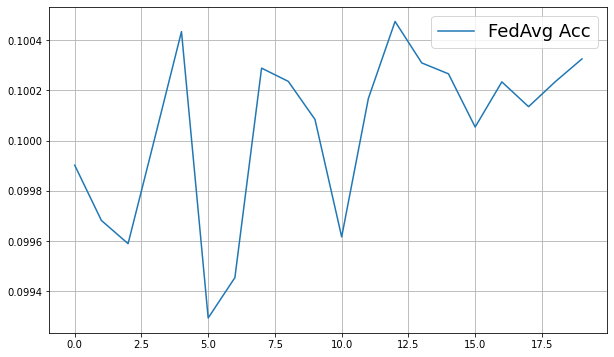

In [8]:
average_acc_list = []


for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum

    average_acc_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_acc_list[:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

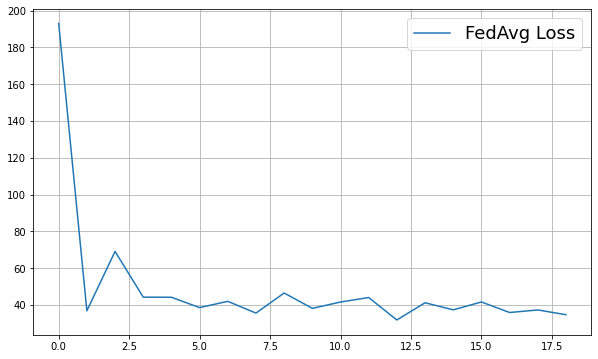

In [7]:
average_loss_list = []


for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum

    average_loss_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_loss_list[1:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()